# [Introduction to Data Science: A Comp-Math-Stat Approach](https://lamastex.github.io/scalable-data-science/as/2019/)
## YOIYUI001, Summer 2019 
&copy;2019 Raazesh Sainudiin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# 05. Random Variables, Expectations, Data, Statistics, Arrays and Tuples, Iterators and Generators


### Topics

1. Continuous Random Variables
- Expectations
- Data and Statistics
- Sample Mean
- Sample Variance
- Order Statistics
- Frequencies
- Empirical Mass Function
- Empirical Distribution Function
- Live Data Ingestion with Try-Catch
- Arrays
- Tuples
- Iterators
- Generators
 

# Random Variables

A random variable is a mapping from the sample space $\Omega$ to the set of real numbers $\mathbb{R}$.  In other words, it is a numerical value determined by the outcome of the experiment.

We already saw *discrete random variables* that take values in a discrete set, of two types:

- those with with finitely many values, eg. the two values in $\{0,1\}$ for the Bernoulli$(\theta)$ RV 
- those with *countably infinitely many* values, eg. values in the set of all non-negative integers: $\{0,1,2,\ldots\}$, for the 'infinite coin tossing experiment' that records the number of consecutive 'Tails' you see before the first 'Heads' occurs.

Now, we will see the other main type of real-valued random variable.

## Continuous random variable

When a random variable takes on values in the continuum we call it a continuous RV.

### Examples

- Volume of water that fell on the Southern Alps yesterday (See video link below)
- Vertical position above sea level, in micrometers, since the original release of a pollen grain at the head waters of a river
- Resting position in degrees of a roulettet wheel after a brisk spin

## Probability Density Function

A RV $X$ with DF $F$ is called continuous if there exists a piece-wise continuous function $f$, called the  probability density function (PDF) $f$ of $X$, such that, for any $a$, $b \in \mathbb{R}$ with $a < b$,

$$
P(a < X \le b) = F(b)-F(a) = \int_a^b f(x) \ dx \ .
$$


The following hold for a continuous RV $X$ with PDF $f$:

For any $x \in \mathbb{R}$, $P(X=x)=0$.
Consequentially, for any $a,b \in \mathbb{R}$ with $a \le b$ 
$$P(a < X < b ) = P(a < X \le b) = P(a \leq X \le b) = P(a \le X < b)$$
By the fundamental theorem of calculus, except possibly at finitely many points (where the continuous pieces come together in the piecewise-continuous $f$): 
$$f(x) = \frac{d}{dx} F(x)$$
And of course $f$ must satisfy:
$$\int_{-\infty}^{\infty} f(x) \ dx = P(-\infty < X < \infty) = 1$$


### You try at home
Watch the Khan Academy [video about probability density functions](https://youtu.be/Fvi9A_tEmXQ) to warm-up to the meaning behind the maths above. Consider the continuous random variable $Y$ that measures the exact amount of rain tomorrow in inches. Think of the probability space $(\Omega,\mathcal{F},P)$ underpinning this random variable $Y:\Omega \to \mathbb{Y}$. Here the sample space, range or support of the random variable $Y$ denoted by $\mathbb{Y} = [0,\infty) =\{y : 0 \leq y < \infty\}$.


In [1]:
def showURL(url, ht=500):
    """Return an IFrame of the url to show in notebook with height ht"""
    from IPython.display import IFrame
    return IFrame(url, width='95%', height=ht) 
showURL('https://en.wikipedia.org/wiki/Integral',600)

## The Uniform$(0,1)$ RV

The Uniform$(0,1)$ RV is a continuous RV with a probability density function (PDF) that takes the value 1 if $x \in [0,1]$ and $0$ otherwise.  Formally, this is written  


$$
\begin{equation}
f(x) = \mathbf{1}_{[0,1]}(x) =
\begin{cases}
1 & \text{if } 0 \le x \le 1 ,\\
0 & \text{otherwise}
\end{cases}
\end{equation}
$$


and its distribution function (DF) or cumulative distribution function (CDF) is:


$$
\begin{equation}
F(x) := \int_{- \infty}^x f(y) \ dy =
\begin{cases}
0 & \text{if } x < 0 , \\
x & \text{if } 0 \le x \leq 1 ,\\
1 & \text{if } x > 1
\end{cases}
\end{equation}
$$


Note that the DF is the identity map in $[0,1]$. 

The PDF, CDF and inverse CDF for a Uniform$(0,1)$ RV are shown below

<img src="images/Uniform01ThreeCharts.png" alt="Uniform01ThreeCharts" width=500>

The Uniform$(0,1)$ is sometimes called the Fundamental Model.

The Uniform$(0,1)$ distribution comes from the Uniform$(a,b)$ family.   

$$
\begin{equation}
f(x) = \mathbf{1}_{[a,b]}(x) =
\begin{cases}
\frac{1}{(b-a)} & \text{if } a \le x \le b,\\
0 & \text{otherwise}
\end{cases}
\end{equation}
$$

This is saying that if $X$ is a Uniform$(a,b)$ RV, then all values of $x$ between $a$ and $b$, i.e., $a \le x \le b$, are equally probable.   The Uniform$(0,1)$ RV is the member of the family where $a=0$, $b=1$.    

 The PDF and CDF for a Uniform$(a,b)$ RV are shown from wikipedia below

<table style="width:95%">
  <tr>
    <th><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/500px-Uniform_Distribution_PDF_SVG.svg.png" alt="500px-Uniform_Distribution_PDF_SVG.svg.png" width=250></th>
    <th><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Uniform_cdf.svg/500px-Uniform_cdf.svg.png" alt="wikipedia image 500px-Uniform_cdf.svg.png" width=250></th> 
  </tr>
</table>

You can dive deeper into this family of random vaiables <a href="https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)">here</a>.

SageMath has a function for simulating samples from a Uniform$(a,b)$ distribution.  We will learn more about this later in the course. Let's go ahead and use it to simulate samples from it below.

In [5]:
uniform(-1,1)  # reevaluate the cell to see how the samples change upon each re-evaluation

0.5075776027778174

# Expectations

The *expectation* of $X$ is also known as the *population mean*, *first moment*, or *expected value* of $X$.

$$
\begin{equation}
E\left(X\right) := \int x \, dF(x) =
\begin{cases}
\sum_x x \, f(x) & \qquad \text{if }X \text{ is discrete} \\
\int x \, f(x)\,dx  & \qquad \text{if } X \text{ is continuous}
\end{cases}
\end{equation}
$$

Sometimes, we denote $E(X)$ by $E X$ for brevity.  Thus, the expectation is a single-number summary of the RV $X$ and may be thought of  as the average.

In general though, we can talk about the Expectation of a function $g$ of a RV $X$.  

The Expectation of a function $g$ of a RV $X$ with DF $F$ is:

$$
\begin{equation}
E\left(g(X)\right) := \int g(x)\,dF(x) =
\begin{cases}
\sum_x g(x) f(x) & \qquad \text{if }X \text{ is discrete} \\
\int g(x) f(x)\,dx  & \qquad \text{if } X \text{ is continuous}
\end{cases}
\end{equation}
$$


provided the sum or integral is well-defined.  We say the expectation exists if


$$
\begin{equation}
\int \left|g(x)\right|\,dF(x) < \infty \ .
\end{equation}
$$

When we are looking at the Expectation of $X$ itself, we have $g(x) = x$

Thinking about the Expectations like this, can you see that the familiar Variance of X is in fact the Expection of $g(x) = (x - E(X))^2$?

The variance of $X$ (a.k.a. second moment)

Let $X$ be a RV with mean or expectation $E(X)$.  The variance of $X$ denoted by $V(X)$ or $VX$ is

$$
V(X) := E\left((X-E(X))^2\right) = \int (x-E(X))^2 \,d F(x)
$$

provided this expectation exists.  The standard deviation denoted by $\sigma(X) := \sqrt{V(X)}$.

Thus variance is a measure of ``spread'' of a distribution.

The $k$-th moment of a RV comes from the Expectation of $g(x) = x^k$.

We call

$$
E(X^k) = \int x^k\,dF(x)
$$


the $k$-th moment of the RV $X$ and say that the $k$-th moment exists when $E(|X|^k) < \infty$.  


## Properties of Expectations



1. If the $k$-th moment exists and if $j<k$ then the $j$-th moment exists.
- If $X_1,X_2,\ldots,X_n$ are RVs and $a_1,a_2,\ldots,a_n$ are constants, then $E \left( \sum_{i=1}^n a_i X_i \right) = \sum_{i=1}^n a_i E(X_i)$
- Let $X_1,X_2,\ldots,X_n$ be independent RVs, then 
  - $E \left(  \prod_{i=1}^n X_i \right) = \prod_{i=1}^{n} E(X_i)$
- $V(X) = E(X^2) - (E(X))^2$
- If $a$ and $b$ are constants, then: $V \left(aX + b\right) = a^2V(X) $
- If $X_1,X_2,\ldots,X_n$ are independent and $a_1,a_2,\ldots,a_n$ are constants, then: $V \left(  \sum_{i=1}^n a_i X_i \right) = \sum_{i=1}^n a_i^2 V(X_i)$

### You try at home

Watch the Khan Academy videos about [probability density functions](https://youtu.be/Fvi9A_tEmXQ) and [expected value](https://youtu.be/j__Kredt7vY) if you want to get another angle on the material more slowly step-by-step:

## The population mean and variance of the Bernoulli$(\theta)$ RV

We have already met the discrete Bernoulli$(\theta)$ RV.  Remember, that if we have an event $A$ with $P(A) = \theta$, then a Bernoulli$(\theta)$ RV $X$ takes the value $1$ if "$A$ occurs" with probability $\theta$ and $0$ if "$A$ does not occur" with probability $1-\theta$. 

In other words, the indicator function $\mathbf{1}_A$ of "$A$ occurs" with probability $\theta$ is the Bernoulli$(\theta)$ RV. 

For example, flip a fair coin.  
Consider the event that it turns up heads.  Since the coin is fair, the probability of this event $\theta$ is $\frac{1}{2}$.  If we define an RV $X$ that takes the value 1 if the coin turns up heads ("event coin turns up heads occurs") and 0 otherwise, then we have a Bernoulli$(\theta = \frac{1}{2})$ RV.  

We all saw that given a parameter $\theta \in [0,1]$, the probability mass function (PMF) for the Bernoulli$(\theta)$ RV $X$ is:

$$
f(x;\theta) = \theta^x (1-\theta)^{1-x} \mathbf{1}_{\{0,1\}}(x) =
\begin{cases}
\theta & \text{if } x=1 \ ,\\
1-\theta & \text{if } x=0 \ ,\\
0 & \text{otherwise}
\end{cases}
$$


and its DF is:

$$
\begin{equation}
F(x;\theta) =
\begin{cases}
1 & \text{if } 1 \le x \ ,\\
1-\theta & \text{if } 0 \le x < 1 \ ,\\
0 & \text{otherwise}
\end{cases}
\end{equation}
$$

Now let's look at some expectations:  the population mean and variance of an RV $X \thicksim$  Bernoulli$(\theta)$. 

Because $X$ is a discrete RV, our expectations use sums rather than integrals.

The first moment or expectation is: 

$$
\begin{array}{lcl} 
E(X) & = & \displaystyle\sum_{x=0}^{1}xf(x;\theta) \\ &=& (0 \times (1-\theta)) + (1 \times \theta)\\ &=& 0 + \theta\\ &=& \theta\\ 
\end{array}
$$

The second moment is: 
$$\begin{array}{lcl} 
E(X^2) &=& \displaystyle\sum_{x=0}^{1}x^2f(x;\theta) \\ 
&=& (0^2 \times (1-\theta)) + (1^2 \times \theta)\\ &=& 0 + \theta\\ &=& \theta
\end{array}
$$

The variance is: 
$$
\begin{array}{lcl} V(X) &=& E(X^2) - \left(E(X)\right)^2\\ &=& \theta - \theta^2\\ &=& \theta(1-\theta) 
\end{array}
$$

We can see that $E(X)$ and $V(X)$ will vary with the parameter $\theta$.  This is why we subscript $E$ and $V$ with $\theta$, to emphasise that the values depend on the parameter.

$$E_{\theta}(X) = \theta$$

$$V_{\theta}(X) = \theta(1-\theta)$$

We can use Sage to do a simple plot to see how $E_{\theta}(X)$ and $V_{\theta}(X)$ vary with $\theta$.

In [6]:
def bernoulliPopMean(th):
    '''A function to find the population mean for an RV distributed Bernoulli(theta).
    
    parameter th is the distribution parameter theta.'''

    return th
    
def bernoulliPopVariance(th):
    '''A function to find the population variance for an RV distributed Bernoulli(theta).
    
    parameter th is the distribution parameter theta.'''
    
    return th*(1-th)


In [7]:
?points

Thus, 

- by using a list comprehension of tuples, 
  - i.e, the points in 2D that define the plot we want, 
- and passing this comprehended list into the `points` method we can plot as follows:

*Feel free and brave to take the code apart to figure it out piece by piece if something is not clear... this is the whole point of these .ipynb notebooks from Raaz!*

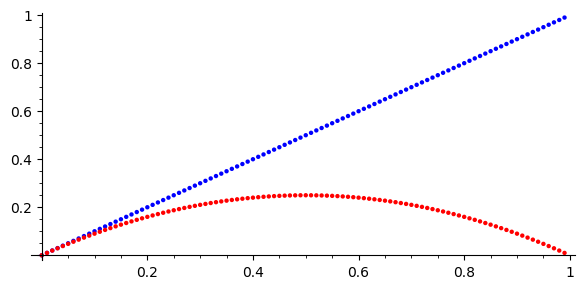

In [8]:
# assign the plot to p
p = points([(x*0.01,bernoulliPopMean(x*0.01)) for x in range(0,100)], rgbcolor="blue") 
# add variance plot to p
p += points([(x*0.01,bernoulliPopVariance(x*0.01)) for x in range(0,100)], rgbcolor="red") 
show(p, figsize=[6,3])


Note how the variance is maximized at $\theta=\frac{1}{2}$. 

## The population mean and variance of the Uniform$(0,1)$ RV

Now let's look at the the population mean and variance of a continuous RV $X \thicksim$ Uniform$(0,1)$. 

Because $X$ is a continuous RV, our expectations use integrals.

$$
\begin{array}{lcl} E(X) &=&\int_{x=0}^1 x f(x)\, dx\\ &=& \int_{x=0}^1 x \ 1 \, dx\\ &=& \frac{1}{2} \left( x^2 \right]_{x=0}^{x=1}\\ &=& \frac{1}{2} \left( 1-0 \right)\\ &=& \frac{1}{2} \end{array}
$$

 

$$
\begin{array}{lcl} E(X^2) &=& \int_{x=0}^1 x^2 f(x)\, dx \\ &=& \int_{x=0}^1 x^2 \ 1 \, dx\\ &=& \frac{1}{3} \left( x^3 \right]_{x=0}^{x=1}\\ &=& \frac{1}{3} \left( 1-0 \right)\\ &=& \frac{1}{3}\\ \end{array}
$$

$$
\begin{array}{lcl} V(X) &=& E(X^2) - \left(E(X)\right)^2\\ &=&\frac{1}{3} - \left( \frac{1}{2} \right)^2\\ &=& \frac{1}{3} - \frac{1}{4}\\ &=& \frac{1}{12} \end{array}
$$



### Winnings on Average

Think about playing a game where we draw $x \thicksim X$ and I pay you $r(x)$ ($r$ is some reward function, a function of $x$ that says what your reward is when $x$ is drawn).  Then, your average winnings from the game is the sum (or integral), over all the possible values of $x$, of $r(x) \times$ the chance that $X=x$.

Put formally, if $Y= r(X)$, then

$$E(Y) = E(r(X)) = \int r(x) \,dF(x)$$

## Probability is an Expectation

Remember when we first talked about the probability of some event $A$, we talked about the idea of the probability of $A$ as the long term relative frequency of $A$? 

Now consider some event $A$ and  a reward function $r(x) = \mathbf{1}_A(x)$.

Recall that $\mathbf{1}_A(x) = 1$ if $ x \in A$ and $\mathbf{1}_A(x) = 0$ if $ x \notin A$: the reward is 1 if $x \in A$ and 0 otherwise.

$$
\begin{array}{lcl} \text{If } X \text{ is continuous } E(\mathbf{1}_A(X)) &=& \int \mathbf{1}_A(x)\, dF(x)\\ &=& \int_A f(x)\, dx\\ &=& P(X \in A) = P(A)\\ \text{If } X \text{ is discrete } E(\mathbf{1}_A(X)) &=& \mathbf{1}_A(x)\, dF(x)\\ &=& \sum_{x \in A} f(x)\\ &=& P(X \in A) = P(A) \\ \end{array}
$$

This says that probability is a special case of expectation: the probability of $A$ is the expectation that $A$ will occur.

Take a Uniform$(0,1)$ RV $X$.  What would you say the probability that an observation of this random variable is $\le 0.5$ is, ie what is $P(X \le 0.5)$?

Let's use SageMath to simulate some observations for us and look at the relative frequency of observations $\le 0.5$:

In [12]:
uniform(0,1) 
# remember calling this each time changes the outcome - reevaluate this cell and see

0.7501678399569756

In [16]:
countObOfInterest = 0    # variable to count observations of interest
numberOfObs = 100       # variable to control how many observations we simulate
obOfInterest = 0.5        # variable for observation of interest
for i in range(numberOfObs): # loop to simulate observations
    if uniform(0,1) <= obOfInterest:    # conditional statement to check observation
        countObOfInterest += 1    # accumulate count of observation of interest
        
print "The relative frequency of x <=", obOfInterest.n(digits=2), \
      " was", RR(countObOfInterest/numberOfObs).n(digits=3)   # just formatting out print output

The relative frequency of x <= 0.50  was 0.390


Or, we could look at a similar simulation for a discrete RV, say a Bernoulli$(\frac{1}{2})$ RV. 

Another way of thinking about the Bernoulli$(\frac{1}{2})$ RV is that it has a discrete uniform distribution over $\{0,1\}$.  It can take on a finite number of values (0 and 1 only) and the probabilities of observing either of these two values are are equal.   

This could be modelling the event that we get a head when we throw a fair coin. For this we'll use the `randint(0,1)` function to simulate the observed value of our RV $X$. 

In [21]:
randint(0,1) # try again and again

1

In [27]:
countObOfInterest = 0    # variable to count observations of interest
numberOfObs = 100000        # variable to control how many observations we simulate
obOfInterest = 1        # variable for observation of interest
for i in range(numberOfObs): # loop to simulate observations
    if randint(0,1) == obOfInterest:    # conditional statement to check observation
        countObOfInterest += 1    # accumulate count of observation of interest
        
print "The relative frequency of x ==", obOfInterest, \
      " was", RR(countObOfInterest/numberOfObs).n(digits=3)   # just formatting out print output

The relative frequency of x == 1  was 0.499


## The $de~Moivre(\frac{1}{k}, \frac{1}{k}, \ldots, \frac{1}{k})$ RV

We have seen that a $Bernoulli(\theta)$ RV has two outcomes (0 and 1).  What if we are interested in modelling situations where there are more than two outcomes of interest? For example, we could use a $Bernoulli(\frac{1}{2})$ RV to model whether the outcome of the flip of a fair coin is a head, but we can't use it for modelling a RV which is the number we get when we toss a six-sided die.  

So, now, we will consider a natural generalization of the $Bernoulli(\theta)$ RV with more than two outcomes. This is called the $de~Moivre(\frac{1}{k}, \frac{1}{k}, \ldots, \frac{1}{k})$ RV (after Abraham de Moivre, 1667-1754), one of the first great analytical probabalists).  

A $de~Moivre(\frac{1}{k}, \frac{1}{k}, \ldots, \frac{1}{k})$ RV $X$ has a discrete uniform distribution over $\{1, 2, ..., k\}$:  there are $k$ possible equally probable or *equiprobable* values that the RV can take. 

If we are rolling a die that is a cube with six faces and $X$ is the number on the face of the die that touches the floor upon coming to a stop, then $k=6$. 

Or think of the New Zealand Lotto game.  There are 40 balls in the machine, numbered $1, 2, \ldots, 40$.  The number on the first ball out of the machine can be modelled as a de Moivre$(\frac{1}{40}, \frac{1}{40}, \ldots, \frac{1}{40})$ RV. 

We say that an RV $X$ is de Moivre$(\frac{1}{k}, \frac{1}{k}, \ldots, \frac{1}{k})$ distributed if its probability mass function PMF is:

$$
f \left(x; \left( \frac{1}{k}, \frac{1}{k}, \ldots, \frac{1}{k} \right) \right) = \begin{cases} 0 & \quad \text{if } x \notin \{1,2,\ldots,k\}\\ \frac{1}{k} & \quad \text{if } x \in \{1,2,\ldots,k\} \end{cases}
$$

We can find the expectation: 
$$
\begin{array}{lcl} E(X) & = & \sum_{x=1}^k xP(X=x)\\ &=& (1 \times \frac{1}{k}) + (2 \times \frac{1}{k}) + \ldots + (k \times \frac{1}{k})\\ &=& (1 + 2 + \dots + k)\frac{1}{k}\\ &=& \frac{k(k+1)}{2}\frac{1}{k}\\ &=& \frac{k+1}{2} \, , \end{array}
$$

the second moment: 
$$
\begin{array}{lcl} E(X^2) & =& \sum_{x=1}^k x^2P(X=x)\\ & =& (1^2 \times \frac{1}{k}) + (2^2 \times \frac{1}{k}) + \ldots + (k^2 \times \frac{1}{k})\\ &=& (1^2 + 2^2 + \dots + k^2)\frac{1}{k}\\ &=& \frac{k(k+1)(2k+1)}{6}\frac{1}{k}\\ &=& \frac{2k^2+3k+1}{6}\, , \end{array}
$$

and finally the variance: 
$$
\begin{array}{lcl} V(X) &=& E(X^2) - \left(E(X)\right)^2\\ &=& \frac{2k^2+3k+1}{6} - \left( \frac{k+1}{2} \right)^2\\ &=&\frac{2k^2+3k+1}{6} - \frac{k^2 + 2k +1}{4}\\ &=& \frac{4(2k^2 + 3k + 1) - 6(k^2 + 2k + 1) }{24}\\ &=& \frac{8k^2 + 12k + 4 - 6k^2 - 12k - 6 }{24}\\ &=& \frac{2k^2-2}{24} \\ &=& \frac{k^2-1}{12} \, . \end{array}
$$

For a physical analog for a $k$-sided die consider the generalisation 
  - of a coin with two faces  
  - to a toblerone bar with three sides, 
  - to a k-sided [regular polygon](https://en.wikipedia.org/wiki/Regular_polygon) *that is extended along the third dimension* so it can be rolled and we can define the outcome of the experiment to be the label of the face that touches the flat surface after coming to rest where the labels are in the set $\{1,2,\ldots,k\}$.

In [28]:
showURL("https://en.wikipedia.org/wiki/Regular_polygon",300)

We coud use the Sage `randint` function to simulate the number on the first ball in a Lotto draw:

In [32]:
myList=[] 
nn=10000
for i in range(nn):
    myList.append(randint(1,40))
len([x for x in myList if x==30])/RR(nn)

0.0254000000000000

In [33]:
1/40. 
# this is the probability that the observed ball is 20 under the model

0.0250000000000000

# Statistics

The official NZ Government site for statistics about New Zealand is http://www.stats.govt.nz/ and that for Sweden is http://www.scb.se/en/About-us/official-statistics-of-sweden/ 

Take a tour through it!

Let's see what is in our `data/` directory in `as/jp` folder for the course.

In [34]:
%%sh
ls data/

co2_mm_mlo.txt
earthquakes.csv.zip
earthquakes.tgz
earthquakes_small.csv
final.csv.zip
final.tgz
pride_and_prejudice.txt
rainfallInChristchurch.csv


## Should we play a bit with data/ live?

In [35]:
%%sh
cd data
# if you don't see final.csv in data/ below
# then either uncomment and try the next line in linux/Mac OSX
tar -zxvf final.tgz
# or try the next line after uncommenting it to extract final.csv
#unzip final.csv.zip
ls -al

final.csv
total 9548
drwxr-xr-x 2 sage sage    4096 Jun 12 10:13 .
drwxr-xr-x 5 sage sage    4096 Jun 12 10:12 ..
-rw-r--r-- 1 sage sage   50555 Jun  9 17:53 co2_mm_mlo.txt
-rw-r--r-- 1 sage sage 1344114 Jun  9 17:53 earthquakes.csv.zip
-rw-r--r-- 1 sage sage 1344959 Jun  9 17:53 earthquakes.tgz
-rw-r--r-- 1 sage sage   77786 Jun  9 17:53 earthquakes_small.csv
-rw-r--r-- 1 sage sage 4894689 Nov  9  2018 final.csv
-rw-r--r-- 1 sage sage  467572 Jun  9 17:53 final.csv.zip
-rw-r--r-- 1 sage sage  467611 Jun  9 17:53 final.tgz
-rw-r--r-- 1 sage sage  724725 Jun  9 17:53 pride_and_prejudice.txt
-rw-r--r-- 1 sage sage  376954 Jun  9 17:53 rainfallInChristchurch.csv


In [36]:
%%sh
head data/final.csv
wc data/final.csv

region,municipality,district,party,votes
Blekinge län,Karlshamn,0 - Centrala Asarum,S,519
Blekinge län,Karlshamn,0 - Centrala Asarum,SD,311
Blekinge län,Karlshamn,0 - Centrala Asarum,M,162
Blekinge län,Karlshamn,0 - Centrala Asarum,V,82
Blekinge län,Karlshamn,0 - Centrala Asarum,KD,53
Blekinge län,Karlshamn,0 - Centrala Asarum,C,37
Blekinge län,Karlshamn,0 - Centrala Asarum,L,37
Blekinge län,Karlshamn,0 - Centrala Asarum,MP,32
Blekinge län,Karlshamn,0 - Centrala Asarum,BLANK,13
  82226  461865 4894689 data/final.csv


**What exactly do we mean by *data* and *statistics*?**

## Data and statistics

In general, given some probability triple $(\Omega, \mathcal{F}, P)$, let the function $X$ measure the outcome $\omega$ from the sample space $\Omega$.

$$X(\omega): \Omega \rightarrow \mathbb{X}$$

The RV $X$ is called **data**, if $X$ is the finest available measurement of $\Omega$.

$\mathbb{X}$ is called the data space (sample space of the data $X$).

$X(\omega)=x$ is the outcome $\omega$ measured by $X$ and is called the observed data or the realisation of $X$.

Often the measurements made by $X$ are real numbers or structures of real numbers or structures that are a mixture of combinatorial objects and real numbers (they typically arise from more general data objects/structures, like addresses, images, videos, trajectories, networks, etc.). 

Recall the definition of a real-valued or $\mathbb{R}$-valued random variable we have already seen (an $\mathbb{R}$-valued random variable $X$ is a specific function or map from the sample space to the real line $\mathbb{R}$).  We have also seen that $X$ can in fact be a real-vector-valued or $\mathbb{R}^n$-valued random variable $X=(X_1,X_2,\ldots,X_n)$, i.e. a vector of $\mathbb{R}$-valued random variables or simply a random vector. A random variable can be much more general as we will see in the sequel - it can be image-valued, movie-valued, mp3-song-valued, graph-valued, etc.  

When we talked about an experiment involving two IID Bernoulli$(\frac{1}{2})$ RVs above (tossing two coins), we listed the different results we might get as (0,0), (1,0), (0,1), (1,1).

Say we observe the outcome $\omega$ = (H, H) (two heads).   Our $Bernoulli$ random vector $X$ measures this as (1,1).  Thus, (1,1) is the observed data or the realisation of $X$.

## So what is a statistic?

A *statistic* is any *[measureable function](https://en.wikipedia.org/wiki/Measurable_function)* of the data: $T(x): \mathbb{X} \rightarrow \mathbb{T}$ or simply that $\mathbb{X} \overset{T}{\rightarrow} \mathbb{T}$.

Thus, a statistic $T$ is also an RV that takes values in the space $\mathbb{T}$.

When $x \in \mathbb{X}$ is the observed data, $T(x)=t$ is the observed statistic of the observed data $x$, i.e., $x \mapsto t$.

### Question: Can Statistic be the Data?

<br /><br />

Consider the identity map... with $T(x)=x$ and $\mathbb{X} = \mathbb{T}$.

#### Remember $\Omega$ is always under the hood!

$$
\Omega \overset{X}{\rightarrow} \mathbb{X} \overset{T}{\rightarrow} \mathbb{T}, \quad \text{with} \quad \omega \mapsto x \mapsto t.
$$

Generally, one cannot explicity work with $\Omega$ (recall $\Omega$ for the indicator random variable of *rain on Southern Alps tomorrow!*) but can work with the following axiomatic cascade towards more concretely measurable events:

- observable events in a sigma-algebra $\mathcal{F}(\Omega)$ or $\mathcal{F}_{\Omega}$ on $\Omega$
- that are captured by the RV $X$ as measurable sets in $\mathcal{F}(\mathbb{X})$, the sigma-algebra over the data space $\mathbb{X}$
- and typically projected further by the statistic $T$, another RV that measurable maps the sigm-algebra $\mathcal{F}(\mathbb{X})$ to the sigma-algebra $\mathcal{F}(\mathbb{T})$.



## Example 2: New Zealand Lotto Data and a Probability Model of it as IID de Moivre RVs

### New Zealand lotto data
Let's look at our pre-made New Zealand lotto data. This is the winning first ball drawn from a NZ Lotto machine for several years.  

In [37]:
# These lotto draws of the first ball from NZ Lotto was already downloaded and processed for you
listBallOne = [4, 3, 11, 35, 23, 12, 14, 13, 15, 19, 36, 18, 37, 39, 37, 35, 39, 1, 24, 29, 38, 18, 40, 35, \
            12, 7, 14, 23, 21, 35, 14, 32, 19, 2, 1, 34, 39, 29, 7, 20, 2, 40, 28, 4, 30, 34, 20, 37, 9, 24,\
            36, 4, 22, 1, 31, 12, 16, 29, 36, 5, 21, 23, 30, 39, 38, 22, 13, 6, 14, 30, 40, 21, 5, 12, 28, 27,\
            13, 18, 19, 23, 2, 10, 37, 31, 40, 4, 25, 4, 17, 6, 34, 26, 38, 35, 3, 38, 14, 40, 3, 30, 21, 4,\
            24, 34, 27, 14, 25, 18, 21, 1, 25, 39, 18, 40, 18, 11, 5, 37, 33, 26, 29, 26, 36, 33, 18, 32, 3, 1,\
            5, 22, 39, 25, 12, 21, 23, 12, 31, 1, 35, 8, 32, 24, 34, 14, 26, 4, 3, 31, 17, 22, 24, 10, 29, 40,\
            4, 8, 26, 11, 8, 18, 25, 22, 8, 30, 10, 14, 32, 14, 5, 35, 3, 32, 40, 17, 39, 7, 21, 4, 35, 9, 16,\
            30, 30, 11, 28, 22, 38, 5, 16, 27, 16, 23, 22, 1, 27, 32, 30, 24, 32, 29, 11, 3, 26, 19, 22, 25, 3,\
            34, 31, 17, 16, 31, 20, 29, 10, 2, 17, 36, 6, 34, 11, 7, 22, 28, 13, 15, 20, 39, 16, 10, 25, 1, 37,\
            14, 28, 35, 20, 39, 3, 39, 20, 40, 6, 20, 17, 26, 27, 4, 24, 40, 16, 24, 7, 8, 25, 16, 15, 8, 29, 13,\
            16, 39, 2, 24, 24, 23, 24, 37, 39, 40, 5, 11, 13, 6, 24, 1, 5, 7, 15, 38, 3, 35, 10, 22, 19, 3, 21,\
            39, 38, 4, 30, 17, 15, 9, 32, 28, 7, 12, 6, 37, 25, 4, 8, 30, 7, 31, 12, 21, 31, 13, 2, 20, 14, 40,\
            32, 23, 10, 1, 35, 35, 32, 16, 25, 13, 20, 33, 27, 2, 26, 12, 5, 34, 20, 7, 34, 38, 20, 8, 5, 11, 17,\
            10, 36, 34, 1, 36, 6, 7, 37, 22, 33, 7, 32, 18, 8, 1, 37, 25, 35, 29, 23, 11, 19, 7, 21, 30, 23, 12,\
            10, 26, 21, 9, 9, 25, 2, 14, 16, 14, 25, 40, 8, 28, 19, 8, 35, 22, 23, 27, 31, 36, 22, 33, 22, 15, 3,\
            37, 8, 2, 22, 39, 3, 6, 13, 33, 18, 37, 28, 3, 17, 8, 2, 36, 1, 14, 38, 5, 31, 34, 16, 37, 2, 40, 14,\
            16, 21, 40, 5, 21, 24, 24, 38, 26, 38, 33, 20, 25, 7, 33, 12, 22, 34, 34, 20, 38, 12, 20, 7, 28, 26,\
            30, 13, 40, 36, 29, 11, 31, 15, 9, 13, 17, 32, 18, 9, 24, 6, 40, 1, 1, 9, 13, 28, 19, 5, 7, 27, 12,\
            3, 34, 26, 20, 28, 28, 25, 21, 23, 6, 15, 19, 30, 10, 13, 8, 11, 38, 7, 33, 12, 16, 11, 40, 25, 32,\
            34, 1, 32, 31, 33, 15, 39, 9, 25, 39, 30, 35, 20, 34, 3, 30, 17, 24, 20, 15, 10, 25, 6, 39, 19, 20,\
            23, 16, 17, 31, 25, 8, 17, 15, 31, 20, 19, 33, 11, 37, 31, 4, 12, 37, 7, 40, 8, 22, 3, 25, 35, 8, 9,\
            14, 13, 33, 4, 2, 1, 31, 24, 8, 13, 19, 34, 10, 32, 35, 28, 11, 10, 31, 25, 8, 6, 13, 33, 19, 35, 19,\
            8, 21, 10, 40, 36, 16, 27, 31, 1, 18, 36, 40, 18, 37, 18, 24, 33, 34, 31, 6, 10, 24, 8, 7, 24, 27, 12,\
            19, 23, 5, 33, 20, 2, 32, 33, 6, 13, 5, 25, 7, 31, 40, 1, 30, 37, 19, 27, 40, 28, 3, 24, 36, 7, 22,\
            20, 21, 36, 38, 15, 11, 37, 21, 4, 13, 9, 12, 13, 34, 30, 8, 23, 40, 4, 13, 6, 4, 22, 35, 2, 35, 20,\
            9, 28, 9, 13, 33, 19, 5, 38, 24, 18, 37, 10, 25, 25, 31, 3, 13, 25, 35, 1, 36, 21, 3, 22, 23, 7, 6,\
            26, 11, 6, 1, 24, 2, 25, 38, 3, 16, 16, 20, 22, 12, 8, 27, 38, 10, 39, 9, 37, 30, 33, 12, 4, 32, 2,\
            29, 6, 34, 2, 3, 12, 9, 1, 22, 40, 38, 9, 18, 40, 17, 5, 17, 26, 17, 26, 6, 7, 18, 10, 27, 24, 39, 1,\
            3, 26, 38, 2, 12, 5, 7, 38, 2, 8, 30, 35, 18, 19, 29, 37, 5, 27, 35, 40, 14, 25, 15, 20, 32, 22, 9, 1,\
            8, 14, 38, 27, 23, 24, 15, 29, 7, 4, 19, 6, 21, 27, 23, 21, 35, 32, 13, 27, 34, 1, 11, 36, 24, 23, 13,\
            2, 33, 25, 18, 1, 10, 5, 27, 1, 36, 36, 11, 3, 31, 30, 31, 39, 7, 21, 25, 28, 38, 2, 3, 40, 10, 40,\
            12, 22, 20, 16, 14, 30, 16, 19, 33, 32, 30, 19, 36, 16, 27, 7, 18, 38, 14, 14, 33, 29, 24, 21, 22, 15,\
            25, 27, 25, 37, 35, 34, 11, 19, 35, 10, 30, 8, 11, 20, 7, 27, 19, 16, 21, 13, 6, 29, 35, 13, 31, 23,\
            26, 10, 18, 39, 38, 5, 16, 33, 21, 31, 21, 23, 32, 35, 2, 24, 11, 25, 30, 7, 18, 32, 38, 22, 27, 2, 6,\
            31, 24, 34, 33, 15, 39, 21, 9, 1, 8, 38, 37, 40, 14, 2, 25, 30, 16, 6, 36, 27, 28, 8, 17, 37, 15, 29,\
            27, 30, 30, 19, 15, 13, 34, 5, 24, 18, 40, 37, 1, 28, 17, 32, 8, 34, 5, 6, 31, 8, 9, 28, 26, 40, 40,\
            9, 23, 36, 28, 24, 33, 18, 36, 6, 22, 29, 6, 6, 25, 15, 29, 18, 38, 20, 26, 30, 17, 30, 32, 33, 19,\
            10, 29, 25, 24, 19, 28, 38, 3, 24, 12, 28, 29, 29, 20, 12, 11, 12, 21, 11, 24, 36, 3, 3, 5, 28, 2,\
            8, 30, 23, 4, 40, 28, 6, 31, 37, 25, 9, 23, 20, 20, 16, 38, 21, 35, 18, 3, 15, 40, 19, 33, 34, 20,\
            3, 11, 34, 35, 10, 32, 23, 10, 29, 13, 12, 6, 30, 7, 5, 4, 29, 22, 22, 2, 26, 24, 7, 13, 26, 27, 27,\
            15, 12, 18, 38, 33, 4, 11, 20, 33, 21, 5, 26, 10, 22, 36, 3, 4, 35, 35, 16, 32, 5, 19, 23, 24, 40,\
            25, 30, 10, 9, 23, 12, 40, 21, 29, 18, 17, 15, 32, 2, 35, 7, 30, 4, 2, 16, 6, 8, 35]

In [38]:
len(listBallOne) # there are 1114 draws from 

1114

### Data Space
The data space is every possible sequence of ball numbers that we could have got in these 1114 draws.  $\mathbb{X} = \{1, 2, \ldots, 40\}^{1114}$.  There are $40^{1114}$ possible sequences and

### Probability model
We can think of this list `listBallOne` of sample size $n=1114$ as $x = (x_1,x_2,\ldots,x_{1114})$, the realisation of a random vector $X = (X_1, X_2,\ldots, X_{1114})$ where $X_1, X_2,\ldots, X_{1114} \overset{IID}{\thicksim} de~Moivre(\frac{1}{40}, \frac{1}{40}, \ldots, \frac{1}{40})$.

$P \left( (X_1, X_2, \ldots, X_{1114}) = (x_1, x_2, \ldots, x_{1114}) \right) = \frac{1}{40} \times \frac{1}{40} \times \ldots \times \frac{1}{40} = \left(\frac{1}{40}\right)^{1114}$ if $(x_1, x_2, \ldots, x_{1114}) \in \mathbb{X} = \{1, 2, \ldots, 40\}^{1114}$

Our data is just one of the $40^{1114}$ possible points in this data space.

## Some statistics

### Sample mean

From a given sequence of RVs $X_1, X_2, \ldots, X_n$, or a random vector $X = (X_1, X_2, \ldots, X_n)$, we can obtain another RV called the sample mean (technically, the $n$-sample mean):

$$T_n((X_1, X_2, \ldots, X_n)) = \bar{X_n}((X_1, X_2, \ldots, X_n)) :=\frac{1}{n}\displaystyle\sum_{i=1}^nX_i$$

We write $\bar{X_n}((X_1, X_2, \ldots, X_n))$ as $\bar{X}_n$,

and its realisation $\bar{X_n}((x_1, x_2, \ldots, x_n))$ as $\bar{x_n}$.

By the properties of expectations that we have seen before,

$$E(\bar{X_n}) = E \left(\frac{1}{n}\sum_{i=1}^nX_i \right) = \frac{1}{n}E\left(\sum_{i=1}^nX_i\right) = \frac{1}{n}\sum_{i=1}^nE(X_i)$$

And because every $X_i$ is identically distributed with the same expectation, say $E(X_1)$, then

$$E(\bar{X_n}) = \frac{1}{n}\sum_{i=1}^nE(X_i)= \frac{1}{n} \times n \times E(X_1) = E(X_1)$$

Similarly, we can show that,

$$V(\bar{X_n}) = V\left(\frac{1}{n}\sum_{i=1}^nX_i\right) = \frac{1}{n^2}V\left(\sum_{i=1}^nX_i\right)$$

And because every $X_i$ is independently and identically distributed with the same variance, say $V(X_1)$, then

$$V(\bar{X_n}) = \frac{1}{n^2}V\left(\sum_{i=1}^nX_i \right) = \frac{1}{n^2} \times n \times V(X_1) = \frac{1}{n} V(X_1)$$

### Sample variance

Sample variance is given by $$ \frac{1}{n}\sum_{i=1}^n \left( X_i - \bar{X}_n \right)^2$$ Sometimes, we divide by $n-1$ instead of $n$. It is a measure of spread from the sample.

Similarly, we can look at a sample standard deviation = $\sqrt{\text{sample variance}}$

# numpy for numerical Python
Python has a nice module called `numpy` for numerical computing akin to MATLAB. We will import `numpy` to use some of its basic statistical capabilities for our Lotto data.  To be able to use these capabilities, it is easiest to convert our Lotto Data into a type called a `numpy.array` or `np.array` if we `import numpy as np`.   (You will be looking more closely at `numpy` `array`s in the You Try sections below).

In [39]:
import numpy as np
#import array, mean, var, std # make pylab stuff we need accessible in Sage
arrayBallOne = np.array(listBallOne) # make the array out of the list
arrayBallOne     # disclose the numpy array


array([ 4,  3, 11, ...,  6,  8, 35])

In [19]:
#arrayBallOne. 
# uncomment above line & hit the Tab after the . and see the available methods on numpy arrays

Now we can get some sample statistics for the lotto ball one data. 

### Sample mean of NZ Lotto data

In [40]:
# this calls the mean method and gives our first statistic, the sample mean
arrayBallOne.mean()

20.64991023339318

In [41]:
# if you just call the method without '()' then you are not evaluating it
arrayBallOne.mean  

<built-in method mean of numpy.ndarray object at 0x7f87089053a0>

In [42]:
# Let's quickly check numpy is behaving correctly...
sampleSum=0.0
for x in arrayBallOne:
    sampleSum = sampleSum+x
print 'mean by loop is = ', sampleSum/len(arrayBallOne)

mean by loop is =  20.6499102333932


**How does one get a deeper understanding of `numpy` and its methods?**

- You need to get to the source and its docs:
  - [https://docs.scipy.org/doc/numpy-1.15.0/index.html](https://docs.scipy.org/doc/numpy-1.15.0/index.html) -- Bookmark it!
- If you search in the above link (or just do a google search), you can find the `.mean()` method's docs:
  - [https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.mean.html](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.mean.html)
  
We are relying on this powerful organization's libraries when computing in Python:
  - [https://scipy.org/](https://scipy.org/) -- right-click and open this link right now!

### Sample vairance and sample standard deviation of NZ Lotto data

In [43]:
arrayBallOne.var()

135.0803096867355

In [44]:
arrayBallOne.std()

11.62240550345476

In [45]:
sqrt(arrayBallOne.var())   # just checking std is indeed sqrt(var)

11.62240550345476

## Order statistics

The $k$th order statistic of a sample is the $k$th smallest value in the sample.  Order statistics that may be of particular interest include the smallest (minimum) and largest (maximum) values in the sample.

In [46]:
arrayBallOne.min()         # sample minimum statistic

1

In [47]:
arrayBallOne.max()         # sample maximum statistic

40

In [48]:
arrayBallOneSorted = np.array(listBallOne) 
# make the array out of the list for sorting next
arrayBallOneSorted.sort()        
# sort the array to get the order statistic - this sorts arrayBallOneSorted 

In [49]:
arrayBallOneSorted             
# the sorted data array - numpy automatically displays with intermediates as ...

array([ 1,  1,  1, ..., 40, 40, 40])

In [50]:
arrayBallOne                   # the original data array

array([ 4,  3, 11, ...,  6,  8, 35])

## Frequencies

The next most interesting statistics we will visit is the frequencies of the ball numbers.

With lots of discrete data like this, we may be interested in the frequency of each value, or the number of times we get a particular value.  This can be formalized as the following process of adding indicator functions of the data points $(X_1,X_2,\ldots,X_n)$: $$ \sum_{i=1}^n \mathbf{1}_{\{X_i\}}(x) $$

We can use the SageMath/Python dictionary to give us a mapping from ball numbers in the list to the count of the number of times each ball number comes up. 

### A Function to Count Elements in a Sequence

Although we are doing this with the Lotto data, mapping a list like this seems like a generally useful thing to be able to do, and so we write it as a function `makeFreqDict(myDataSeq)` and then use the function on our Lotto data. This is a good example of reusing useful code through a function. We will rely on this function in the sequel for other input data.

We can use `long` integers if we need to count a lot of items or the usual `int` type in Python to count the elements in `myDataSeq`. We can use the default value for the second parameter named `one` to be of type `int` by the following second argument with **default parameter value**: `one=int(1)` to `makeFreqDict`. This will enable us to specify `one=long(1)` if we want the counting to be done in `long` integers if necessary. See [https://docs.python.org/2.0/ref/function.html](https://docs.python.org/2.0/ref/function.html) for default parameters in functions.

Also Python's integer types are supposed to get as big (up to available address space in memory) as one needs, as discussed in detail here:

- [https://stackoverflow.com/questions/9860588/maximum-value-for-long-integer](https://stackoverflow.com/questions/9860588/maximum-value-for-long-integer)

**In Python 2:** `sys.maxint` is the largest positive integer supported by Python’s regular integer type `int`. This is at least $2^{64-1}$. The largest negative integer is -`sys.maxint`-1.

`sys.maxsize` is the largest positive integer supported by the platform’s `Py_ssize_t` type, and therefore it is *the maximum size* for lists, strings, dicts, and many other containers.

We will still pass in the additional argument for `one` into our `makeFreqDict` function for pedagogical reasons and to avoid the more heavy-duty SageMath's type of `'sage.rings.integer.Integer'`.

In [51]:
import sys
print "sys.maxint and sys.maxsize values are:"
print (sys.maxint, sys.maxsize)
print "\nIn powers of 2 and 10 they are:"
print (2^63-1, log(sys.maxint+1,2), log(sys.maxint+1,10).n())   # sys.maxint ~= 
print (sys.maxsize, log(sys.maxsize+1,2), log(sys.maxsize+1,10).n()) 
# sys.maxsize ~= 10^19


sys.maxint and sys.maxsize values are:
(9223372036854775807, 9223372036854775807)

In powers of 2 and 10 they are:
(9223372036854775807, 63, 18.9648897268308)
(9223372036854775807, 63, 18.9648897268308)


In [59]:
# Note that long is a Python long integer
myLongInteger = long(1)
print(myLongInteger)
type(myLongInteger)

1


<type 'long'>

In [60]:
type(1)

<type 'sage.rings.integer.Integer'>

In [61]:
def makeFreqDict(myDataSeq, one = int(1)):
    '''Make a frequency mapping out of a sequence of data - list, array, str.
    
    Param myDataList, a list of data.
    Return a dictionary mapping each unique data value to its frequency count.'''
       
    freqDict = {} # start with an empty dictionary
        
    for res in myDataSeq:
        
        if res in freqDict: # the data value already exists as a key
                freqDict[res] = freqDict[res] + one #int(1) # add 1 to the count
        else: # the data value does not exist as a key value
            # add a new key-value pair for this new data value, frequency 1
            freqDict[res] = one 
        
    return freqDict # return the dictionary created

In [62]:
myExampleDataList = [1,2,2,3,3,3] # a list with one 1, two 2's and three 3's
# the frequencies are returned as a dictionary
myExampleFreqDict = makeFreqDict(myExampleDataList) 
myExampleFreqDict


{1: 1, 2: 2, 3: 3}

In [63]:
# this returns the (k,v) or key,value pairs in the dictionary as a list
myExampleFreqDict.items()  

[(1, 1), (2, 2), (3, 3)]

In [38]:
myExampleFreqDict.keys() # this returns the keys

[1, 2, 3]

In [64]:
# this returns the values which happens to be same in our case!
myExampleFreqDict.values() 

[1, 2, 3]

In [65]:
# the long frequencies are returned as a dictionary
myExampleFreqLongsDict = makeFreqDict(myExampleDataList,long(1))
myExampleFreqLongsDict

{1: 1L, 2: 2L, 3: 3L}

In [66]:
# the int frequencies are returned as a dictionary
myExampleFreqIntDict = makeFreqDict(myExampleDataList, int(1)) 
myExampleFreqIntDict

{1: 1, 2: 2, 3: 3}

In [67]:
# the frequencies are returned as a dictionary with default one
myExampleFreqDict = makeFreqDict(myExampleDataList) 
myExampleFreqDict

{1: 1, 2: 2, 3: 3}

In [68]:
# the last two freq dictionaries are the same!
myExampleFreqIntDict  == myExampleFreqDict   

True

Note that the function `makeFreqDict` also works on other sequence types like `numpy.arrays`, and `str` or sequence of bytes.

In [69]:
myExampleDataArray = np.array(myExampleDataList)
makeFreqDict(myExampleDataArray)

{1: 1, 2: 2, 3: 3}

In [70]:
myExampleDataStr = '122333'
makeFreqDict(myExampleDataStr)

{'1': 1, '2': 2, '3': 3}

Let us use the `makeFreqDict` to find the frequencies of every character in Jane Austen's *Pride and Prejudice* next.

In [71]:
%%sh
head -50 data/pride_and_prejudice.txt

﻿The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Pride and Prejudice

Author: Jane Austen

Posting Date: August 26, 2008 [EBook #1342]
Release Date: June, 1998
Last Updated: March 10, 2018

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***




Produced by Anonymous Volunteers





PRIDE AND PREJUDICE

By Jane Austen



Chapter 1


It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered the right

In [72]:
with open('data/pride_and_prejudice.txt', 'r') as myfile:
  prideAndPrejudiceRaw = myfile.read().decode('utf-8')

In [73]:
countPandP = makeFreqDict(prideAndPrejudiceRaw)
countPandP

{u'\n': 13427,
 u'\r': 13427,
 u' ': 113941,
 u'!': 500,
 u'#': 1,
 u'$': 2,
 u'%': 1,
 u"'": 748,
 u'(': 38,
 u')': 38,
 u'*': 58,
 u',': 9280,
 u'-': 1196,
 u'.': 6396,
 u'/': 26,
 u'0': 29,
 u'1': 83,
 u'2': 33,
 u'3': 33,
 u'4': 30,
 u'5': 29,
 u'6': 18,
 u'7': 12,
 u'8': 20,
 u'9': 17,
 u':': 155,
 u';': 1538,
 u'?': 462,
 u'@': 2,
 u'A': 539,
 u'B': 1114,
 u'C': 667,
 u'D': 597,
 u'E': 856,
 u'F': 207,
 u'G': 283,
 u'H': 701,
 u'I': 2674,
 u'J': 332,
 u'K': 101,
 u'L': 788,
 u'M': 1724,
 u'N': 294,
 u'O': 240,
 u'P': 297,
 u'Q': 1,
 u'R': 177,
 u'S': 578,
 u'T': 877,
 u'U': 70,
 u'V': 29,
 u'W': 651,
 u'X': 2,
 u'Y': 379,
 u'Z': 5,
 u'[': 1,
 u']': 1,
 u'_': 808,
 u'a': 42156,
 u'b': 8248,
 u'c': 13397,
 u'd': 22247,
 u'e': 70344,
 u'f': 12177,
 u'g': 10161,
 u'h': 33883,
 u'i': 36273,
 u'j': 638,
 u'k': 3241,
 u'l': 21282,
 u'm': 13401,
 u'n': 38430,
 u'o': 41138,
 u'p': 8386,
 u'q': 637,
 u'r': 33293,
 u's': 33292,
 u't': 47283,
 u'u': 15439,
 u'v': 5811,
 u'w': 11922,
 u'x': 8

Let us use the `makeFreqDict` to find the frequencies of the balls that popped out first in the 1114 NZ Lotto draws.

In [74]:
ballOneFreqs = makeFreqDict(listBallOne) # call the function
print(ballOneFreqs)                         # disclose it

{1: 29, 2: 28, 3: 31, 4: 24, 5: 27, 6: 30, 7: 31, 8: 32, 9: 22, 10: 27, 11: 25, 12: 28, 13: 29, 14: 22, 15: 22, 16: 27, 17: 20, 18: 28, 19: 28, 20: 32, 21: 30, 22: 30, 23: 27, 24: 36, 25: 37, 26: 22, 27: 26, 28: 24, 29: 24, 30: 33, 31: 28, 32: 27, 33: 28, 34: 27, 35: 34, 36: 24, 37: 26, 38: 30, 39: 22, 40: 37}


Thus, balls labelled by the number 1 come up 29 times in the first ball drawn (Ball One) out of 1,114 Lotto trials.   Similarly, the number 2 comes up 28 times, ... 40 comes up 37 times.  Of course, these numbers would be different if you have downloaded a more recent data file with additional trials!

So what?   Well, we'd hope that the lotto is fair, i.e. that the probability of each ball coming up with any of the available numbers is the same for each number:   the probability that Ball One is a 1 is the same as the probability that it is 2, is the same as the probability that it is 3,..... , is the same as the probability that it is 40.   If the lotto is fair, the number that comes up on each ball should be a discrete uniform random variable.  More formally, we would expect it to be the de Moivre$(\frac{1}{40}, \frac{1}{40}, \ldots, \frac{1}{40})$ RV as lectured.   Over the long term, we'd expect the number of times each number comes up on a given trial to be about the same as the number of times any other number comes up on that trial.

We have data from 1987 to 2008, and a first step to assessing the fairness of the lotto (for Ball One, anyway) could be to just visualise the data.   We can use the list of points we created above and the SageMath plotting function points to plot a simple graphic like this.

Here we are plotting the frequency with which each number comes up against the numbers themselves, but it is a bit hard to see what number on the ball each red point relates to.   To deal with this we add dotted lines going up from the number on the horizontal axis to the corresponding (number, frequency) tuple plotted as a red point.

For these plots let us use SageMath Graphics primitives: `point`, `points` and `line`, and their `+` operations for superimpositions.

In [50]:
?point # Returns either a 2-dimensional or 3-dimensional point or "sum" of points as Graphics object

In [75]:
?line # Returns either a 2-dimensional or 3-dimensional line depending on value of points as Graphics object

In [76]:
print(ballOneFreqs.items())

[(1, 29), (2, 28), (3, 31), (4, 24), (5, 27), (6, 30), (7, 31), (8, 32), (9, 22), (10, 27), (11, 25), (12, 28), (13, 29), (14, 22), (15, 22), (16, 27), (17, 20), (18, 28), (19, 28), (20, 32), (21, 30), (22, 30), (23, 27), (24, 36), (25, 37), (26, 22), (27, 26), (28, 24), (29, 24), (30, 33), (31, 28), (32, 27), (33, 28), (34, 27), (35, 34), (36, 24), (37, 26), (38, 30), (39, 22), (40, 37)]


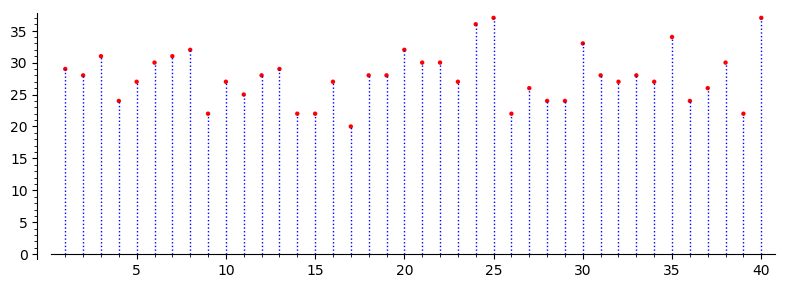

In [77]:
# DATA we plot each item (k,f) in ballOneFreqs.items() 
#  as a red points at (k,f), k is ball number, f is frequency
lottoPlotCounts = point(ballOneFreqs.items(), rgbcolor="red")

# MODEL next loop through each key k and add a blue dotted line 
# that goes from (k, 0) to (k, ballOneFreqs[k])
for k in ballOneFreqs.keys():
    lottoPlotCounts += line([(k, 0),(k, ballOneFreqs[k])], rgbcolor="blue", linestyle=":")

show(lottoPlotCounts, figsize=[8,3])


In [78]:
def makeEMF(myDataList):
    '''Make an empirical mass function from a data list.
    
    Param myDataList, list of data to make emf from.
    Return list of tuples comprising (data value, relative frequency) 
    ordered by data value.''' 

    freqs = makeFreqDict(myDataList)     # make the frequency counts mapping
    totalCounts = RR(sum(freqs.values())) # make mpfr_real to make relFreqs are fractions    
    relFreqs = [fr/totalCounts for fr in freqs.values()] # use a list comprehension
    # zip the keys and relative frequencies together
    numRelFreqPairs = zip(freqs.keys(), relFreqs)     
    return numRelFreqPairs


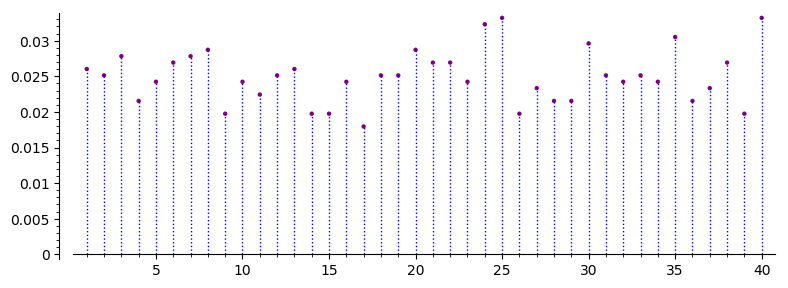

In [79]:
# make a list of unique data values and their relative frequencies
numRelFreqPairs = makeEMF(listBallOne) 

lottoPlotEMF = point(numRelFreqPairs, rgbcolor = "purple")
for k in numRelFreqPairs:    # for each tuple in the list
    kkey, kheight = k     # unpack tuple
    lottoPlotEMF += line([(kkey, 0),(kkey, kheight)], rgbcolor="blue", linestyle=":")
    
show(lottoPlotEMF, figsize=[8,3])


Let us plot the probability mass function (PMF) of the hypothesized probability model for a fair NZ Lotto, i.e., the PMF of the RV $X$ ~ de Moivre$(1/40,1/40, ... , 1/40)$ and overlay it on the empirical mass function of the observed data.  We will meet list comprehension properly in a future worksheet.

In [80]:
# list comprehension by the constant 1/40 for f(x)=1/40, x=1,2,...,40
ballOneEqualProbs = [1/40 for x in range(1,41,1)]    

In [81]:
print(ballOneEqualProbs)

[1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40, 1/40]


In [82]:
# make a list of (x,f(x)) tuples for the PDF using zip
numEqualProbsPairs = zip(ballOneFreqs.keys(), ballOneEqualProbs) 
print(numEqualProbsPairs) # print the list of tuple

[(1, 1/40), (2, 1/40), (3, 1/40), (4, 1/40), (5, 1/40), (6, 1/40), (7, 1/40), (8, 1/40), (9, 1/40), (10, 1/40), (11, 1/40), (12, 1/40), (13, 1/40), (14, 1/40), (15, 1/40), (16, 1/40), (17, 1/40), (18, 1/40), (19, 1/40), (20, 1/40), (21, 1/40), (22, 1/40), (23, 1/40), (24, 1/40), (25, 1/40), (26, 1/40), (27, 1/40), (28, 1/40), (29, 1/40), (30, 1/40), (31, 1/40), (32, 1/40), (33, 1/40), (34, 1/40), (35, 1/40), (36, 1/40), (37, 1/40), (38, 1/40), (39, 1/40), (40, 1/40)]


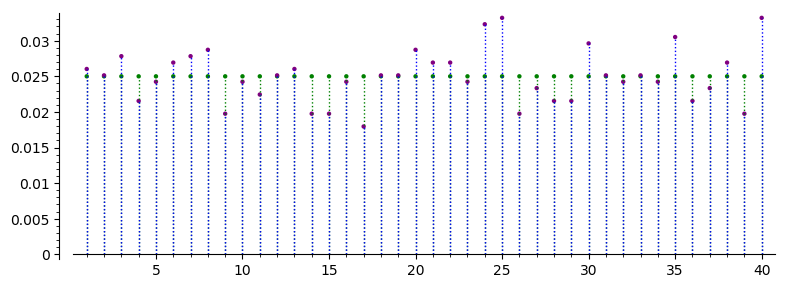

In [83]:
# make a list of unique data values and their relative frequencies
numRelFreqPairs = makeEMF(listBallOne) 

# make the EMF plot
lottoPlotEMF = point(numRelFreqPairs, rgbcolor = "purple")
for k in numRelFreqPairs:    # for each tuple in the list
    kkey, kheight = k     # unpack tuple
    lottoPlotEMF += line([(kkey, 0),(kkey, kheight)], rgbcolor="blue", linestyle=":")

# make sure we have the equal probabilities
ballOneEqualProbs = [1/40 for x in range(1,41,1)]    
numEqualProbsPairs = zip(ballOneFreqs.keys(), ballOneEqualProbs) # and the pairs

# make a plot of the equal probability pairs
equiProbabledeMoivre40PMF = point(numEqualProbsPairs, rgbcolor = "green")
for e in numEqualProbsPairs:    # for each tuple in list
    ekey, eheight = e     # unpack tuple
    equiProbabledeMoivre40PMF += line([(ekey, 0),(ekey, eheight)], rgbcolor="green", \
                                      linestyle=":")

# plot the PMF and the PDF
show(equiProbabledeMoivre40PMF + lottoPlotEMF, figsize=[8,3]) 

### Empirical Distribution Function

Another extremely important statistics of the observed data is called the empirical distribution function (EDF).  The EDF is the empirical or data-based distribution function (DF) just like the empirical mass function (EMF) is the empirical or data-based probability mass function (PMF). This can be formalized as the following process of adding indicator functions of the half-lines beginning at the data points 
$[X_1,+\infty),[X_2,+\infty),\ldots,[X_n,+\infty)$: 
$$\widehat{F}_n (x) = \frac{1}{n} \sum_{i=1}^n \mathbf{1}_{[X_i,+\infty)}(x) $$
 
Next, let's make a function called `makeEDF` to return the empirical distribution function from a list of data points.

In [84]:
def makeEDF(myDataList):
    '''Make an empirical distribution function from a data list. 
    
        Param myDataList, list of data to make emf from.
        Return list of tuples comprising (data value, cumulative relative frequency) 
        ordered by data value.
    ''' 
    freqs = makeFreqDict(myDataList)     # make the frequency counts mapping
    totalCounts = RR(sum(freqs.values())) # make mpfr_real to make relFreqs as fractions
    relFreqs = [fr/totalCounts for fr in freqs.values()] # use a list comprehension
    relFreqsArray = np.array(relFreqs)
    cumFreqs = list(relFreqsArray.cumsum())
    # zip the keys and culm relative frequencies together
    numCumFreqPairs = zip(freqs.keys(), cumFreqs) 
    
    return numCumFreqPairs

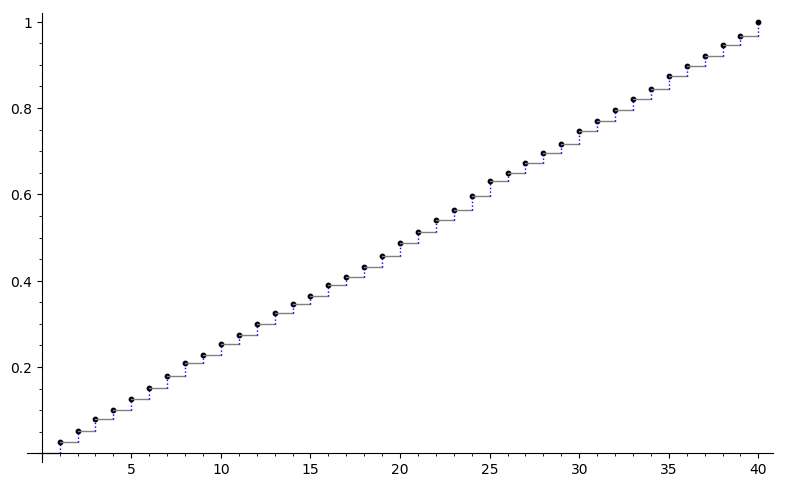

In [87]:
numCumFreqPairs = makeEDF(listBallOne)
lottoPlotEDF = points(numCumFreqPairs, rgbcolor = "black", faceted = true)

for k in range(len(numCumFreqPairs)):
    x, kheight = numCumFreqPairs[k]     # unpack tuple
    previous_x = 0
    previous_height = 0
    if k > 0:
        previous_x, previous_height = numCumFreqPairs[k-1] # unpack previous tuple
    lottoPlotEDF += line([(previous_x, previous_height),(x, previous_height)], rgbcolor="grey")
    lottoPlotEDF += points((x, previous_height),rgbcolor = "white", faceted = true)
    lottoPlotEDF += line([(x, previous_height),(x, kheight)], rgbcolor="blue", linestyle=":")

show(lottoPlotEDF, figsize=(8,5))


## Pride and Prejidice he-she counter - Revisited

Recall our little snippets of code that extracted the number of `he` and `she` words in each Chapter of the entire text of *Pride and Prejudice*.

Now you should know all the different SageMath/Python components that went into this job. Let's see those snippets again below.

We have also used regular expressions or *regex*s here by leveraging the `re` library when we did `import re`. Besides regexes everything else should make sense to you now, as we have covered loops and conditional list and set comprehensions as well as the basics of lists, sets, strings and unicodes already. We briefly look at what regexes are below.

In [88]:
# We are loading the file from our data directory
with open('data/pride_and_prejudice.txt', 'r') as myfile:
  prideAndPrejudiceRaw = myfile.read().decode('utf-8')

import re 
heList = []
sheList = []
i = 0
# make a list of chapters
chapterList = re.sub('\\s+', ' ',prideAndPrejudiceRaw).split('Chapter ')[1:]
for chapter in chapterList:
    i = i+1 # increment chanpter count
    content = (repr(chapter[0:]).decode('unicode_escape')).lower() # get content as lower-case
    heCount = content.count('he') # count number of 'he' occurrences in the chapter
    sheCount = content.count('she') # count number of 'she' occurrences in the chapter
    heList.append((i,heCount)) # append to heList
    sheList.append((i,sheCount)) # append to sheList


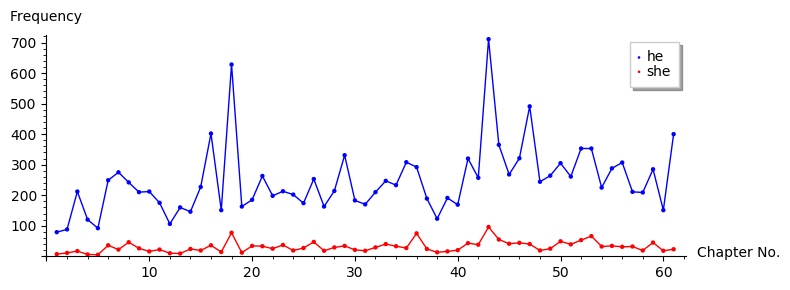

In [89]:
p = points(heList, color='blue',legend_label='he')
p += line(heList, color='blue')
p += points(sheList, color='red',legend_label='she')
p += line(sheList, color='red')
p.axes_labels(['Chapter No.','Frequency'])
p.axes_labels_size(1.0)
p.show(figsize=[8,3])

## Pride and Prejidice big_Words_Set counter - Revisited

You should be able to understand the various components of the next code snippet that finds all the big words in the text of *Pride and Prejudice* using the Python `set`. 

In [90]:
# We are loading the file from our data directory
with open('data/pride_and_prejudice.txt', 'r') as myfile:
  prideAndPrejudiceRaw = myfile.read().decode('utf-8')

import re 
bigWordsSet = set([]) # start an empty set
# make a list of chapters
chapterList = re.sub('\\s+', ' ',prideAndPrejudiceRaw).split('Chapter ')[1:]
for chapter in chapterList:
    content = (repr(chapter[0:]).decode('unicode_escape')).lower() # get content as lower-case
    bigWordsSet = bigWordsSet | \
                    set([x for x in content.split(' ') if (len(x)>14 and x.isalpha())])
    # union with list-comprehended set - soon you will get this!
    
bigWordsSet # set of big words with > 14 characters in any chapter of P&P

{u'accomplishments',
 u'acknowledgments',
 u'communicativeness',
 u'condescendingly',
 u'congratulations',
 u'conscientiously',
 u'disappointments',
 u'discontentedness',
 u'disinterestedness',
 u'inconsistencies',
 u'merchantibility',
 u'misrepresentation',
 u'recommendations',
 u'representations',
 u'superciliousness',
 u'thoughtlessness',
 u'uncompanionable',
 u'unenforceability'}

In [91]:
showURL("https://en.wikipedia.org/wiki/Regular_expression",400)

# Tapping into libraries

Instead of rolling our own step functions using the primitive graphics objects of `points` and `line` we can just tap into the powerful visualisation library called `matplotlib`.

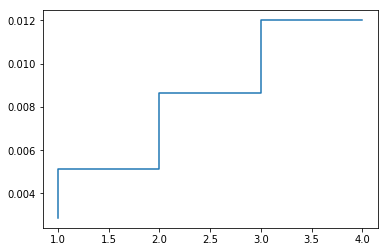

In [92]:
import matplotlib.pyplot as plt

x = [1,2,3,4] 
y = [0.002871972681775004, 0.00514787917410944, 
     0.00863476098280219, 0.012003316194034325]

plt.step(x, y)
plt.show()

# Live You&ITry now!

Turn the `heList` into a cummulative plot as above, i.e., make a plot of the cummulative frequency of the occurrence of `he` words by Chapter.

Start editing below. You will need `heList` of course. Try to use `np.array` and its `.cumsum()` method instead of doing it from more elementary list comprehensions. 

Let's do this live now...

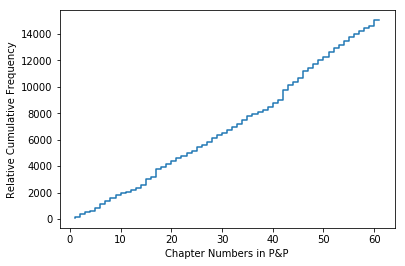

In [93]:
import numpy as np
import matplotlib.pyplot as plt 

Xs = np.array([x[0] for x in heList])
Ys = np.array([x[1] for x in heList]).cumsum()#/15037.0

plt.ylabel('Relative Cumulative Frequency')
plt.xlabel('Chapter Numbers in P&P')
plt.step(Xs, Ys)
plt.show()

## Real-world Data Ingestion

Let us download the New York Power Ball winning lottery numbers since 2010 from this US government site:

- [https://catalog.data.gov/dataset/lottery-powerball-winning-numbers-beginning-2010](https://catalog.data.gov/dataset/lottery-powerball-winning-numbers-beginning-2010)
    
using this url as a comma-separated-variable or csv file: 

- [https://data.ny.gov/api/views/d6yy-54nr/rows.csv?accessType=DOWNLOAD](https://data.ny.gov/api/views/d6yy-54nr/rows.csv?accessType=DOWNLOAD)

#### This is a live fetch! 
##### So we have to figure it out on the fly as new records are added to the winning New York  power ball data. 

There are two methods to download the file. Try the first one with `urllib2` and if this does not work try the second method with `curl` where you are downloading the file to your `data/` folder.

##### First method to downlod NYpowerball data with `urllib2` 
###### live and directly from `https://data.ny.gov/` using `https` = secure hyper-text transfer protocol
If there are errors due to ssl certificates when evaluating the next cell then try the second method below using `http` = hyper-text transfer protocol from the backed-up data at `lamastex.org`

In [95]:
# first method to download the NYpowerball data
import urllib2 as U
# evaluate the cell as it is first - t should work for most of you
# https://stackoverflow.com/questions/27835619/urllib-and-ssl-certificate-verify-failed-error
# This is not the ideal approach, but in docker uncomment the next 3 #'s if SSL cert fails
import ssl
context = ssl._create_unverified_context()
NYpowerball = U.urlopen('https://data.ny.gov/api/views/d6yy-54nr/rows.csv?accessType=DOWNLOAD'\
                      ,context=context \
                     ).read().decode('utf-8')

##### Second method to downlod NYpowerball data with `curl` from `http://lamastex.org`
You need to evaluate **the next two cells** for this method. Only do this if you have errors from the first method.

In [96]:
%%sh
cd data
# method 2 - Part A - download and save file in data/
curl -o NYPowerBall.csv http://lamastex.org/datasets/public/NYCUSA/NYPowerBall20190213.csv
wc -l NYPowerBall.csv

942 NYPowerBall.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29002  100 29002    0     0  31558      0 --:--:-- --:--:-- --:--:-- 31558


In [97]:
# Method 2 - Part B - We are loading the file from our data directory
with open('data/NYPowerBall.csv', 'r') as myfile:
  NYpowerball = myfile.read().decode('utf-8')

In [71]:
type(NYpowerball) # this is a unicode sequence

<type 'unicode'>

In [72]:
# this splits the unicode by the end of line character '\n' in a list
NYpowerballLines = NYpowerball.split('\n') 

In [73]:
type(NYpowerballLines) # we have a list of lines now

<type 'list'>

In [74]:
#  we can see the first 10 lines now and the first 0-index row is the header line
NYpowerballLines[0:10] 

[u'Draw Date,Winning Numbers,Multiplier',
 u'02/09/2019,01 02 03 07 39 25,3',
 u'02/06/2019,05 13 28 38 63 21,5',
 u'02/02/2019,10 17 18 43 65 13,5',
 u'01/30/2019,02 12 16 29 54 06,2',
 u'01/26/2019,08 12 20 21 32 10,4',
 u'01/23/2019,23 25 47 48 50 24,3',
 u'01/19/2019,05 08 41 65 66 20,3',
 u'01/16/2019,14 29 31 56 61 01,2',
 u'01/12/2019,07 36 48 57 58 24,2']

In [75]:
len(NYpowerballLines) 
# looks like there are 919 items (lines) in the list 

943

In [76]:
NYpowerballLines[1] 
# this grabs the first row of data - the winning numbers from Feb 03 2010

u'02/09/2019,01 02 03 07 39 25,3'

In [77]:
NYpowerballLines[1].split(',') 
# this further split the row by comma character ',' into another list

[u'02/09/2019', u'01 02 03 07 39 25', u'3']

In [78]:
NYpowerballLines[1].split(',')[1] 
# this grabs the second element of the list with index 1

u'01 02 03 07 39 25'

In [79]:
NYpowerballLines[1].split(',')[1].split(' ') 
# this splits the 6 integers by white space ' '

[u'01', u'02', u'03', u'07', u'39', u'25']

In [80]:
NYpowerballLines[1].split(',')[1].split(' ')[0] 
# this grabs the first element of this list with 0-index

u'01'

In [81]:
int(NYpowerballLines[1].split(',')[1].split(' ')[0]) 
# now we can turn this string into a Python int

1

That was not too hard. But what we really want is the first winning number across all the draws. 

We can simply apply the expression in the last cell and loop it through each item say `Line` in `NYpowerballLines`:

-  `int(Line[1].split(',')[1].split(' ')[0])`

So let's do it.

In [82]:
firstWins = [] # initialize an empty list to append to it each winning first number
for Line in NYpowerballLines:
    win1 = int(Line.split(',')[1].split(' ')[0])
    firstWins.append(win1)

ValueError: invalid literal for int() with base 10: 'Winning'

Opps, we got a `ValueError: invalid literal for int() with base 10: 'Winning'`.

In [83]:
NYpowerballLines[0]   
# remember our header Line at index 0 has 'Winning' a string and this can't be cast to int

u'Draw Date,Winning Numbers,Multiplier'

We need to handle such error carefully, as data downloaded from public sources will generally come woth such caveats and more complicated issues in general.

A proper way to handle such errors safely is called 'Exception Handling' using `try` and `catch`. Briefly from the [docs](https://docs.python.org/2/tutorial/errors.html#handling-exceptions):

> The `try` statement works as follows.
> 
> - First, the try clause (the statement(s) between the try and except keywords) is executed.
> - If no exception occurs, the except clause is skipped and execution of the try statement is finished.
> - If an exception occurs during execution of the try clause, the rest of the clause is skipped. Then if its type matches the exception named after the except keyword, the except clause is executed, and then execution continues after the try statement.
> - If an exception occurs which does not match the exception named in the except clause, it is passed on to outer try statements; if no handler is found, it is an unhandled exception and execution stops with a message as shown above.

In [84]:
# let's be cautious and process only the first 10 lines
firstWins = [] # initialize an empty list to append to it each winning first number
for Line in NYpowerballLines[0:10]:
    try:
        win1 = int(Line.split(',')[1].split(' ')[0])
        firstWins.append(win1)
    except ValueError:
        print "Err.. numbers only - input was: ", Line

Err.. numbers only - input was:  Draw Date,Winning Numbers,Multiplier


In [85]:
firstWins 
# looks like we gracefully converted the first winning numbers for lines 2-10 indexed 1-9

[1, 5, 10, 2, 8, 23, 5, 14, 7]

In [86]:
# now let's bravely process all the lines
firstWins = [] # initialize an empty list to append to it each winning first number
for Line in NYpowerballLines:
    try:
        win1 = int(Line.split(',')[1].split(' ')[0])
        firstWins.append(win1)
    except ValueError:
        print "Err.. numbers only - line was: ", Line       

Err.. numbers only - line was:  Draw Date,Winning Numbers,Multiplier


IndexError: list index out of range

Now we have a new error `IndexError: list index out of range`. But let's see how many numbers have been appended in our list `firstWins`.

In [87]:
len(firstWins)

941

In [88]:
NYpowerballLines[941] 
# this grabs the second last row of data - the winning numbers from 02/03/2010

u'02/03/2010,17 22 36 37 52 24,2'

In [89]:
len(NYpowerballLines) # but there is another line at the last index 940

943

In [90]:
NYpowerballLines[942] 
# contents of the last line looks empty! this is our problem

u''

So, we need to handle this new exception.

From the [docs](https://docs.python.org/2/tutorial/errors.html#handling-exceptions) we note that:

> A `try` statement may have more than one `except` clause, to specify handlers for different exceptions. At most one handler will be executed....

Let's have an `except` clause for `IndexError` next.

In [91]:
# now let's bravely process all the Lines
firstWins = [] # initialize an empty list to append to it each winning first number
for Line in NYpowerballLines:
    try:
        win1 = int(Line.split(',')[1].split(' ')[0])
        firstWins.append(win1)
    except ValueError:
        print "Err.. numbers only - line was: ", Line
    except IndexError:
        print "list length had IndexError - line was: ", Line

Err.. numbers only - line was:  Draw Date,Winning Numbers,Multiplier
list length had IndexError - line was:  


In [92]:
len(firstWins) # now we got an exception-handled data processing done!

941

In [93]:
print firstWins[0:10], "...", firstWins[931:] 
# the first and last 10 balls in our list

[1, 5, 10, 2, 8, 23, 5, 14, 7, 6] ... [10, 7, 18, 4, 13, 7, 10, 5, 14, 17]


Congratulations!  You have taken your first step towards being a data scientist who knows  *applied statistics* from first principles!

Data scientists need to be strong in *applied statistics* and are expected to directly work with data and not merely load data from pre-made libraries. 

More crucially, *mathematical statistical data scientists* are expected to be comfortable with axiomatic probability and mathematical statistical theory (we will learn more in the sequel).

Finally, *computational mathematical statistical data scientists*, students being trained here, can apply (and even develop as needed in cooperation with domain experts) the right model, methods and theory for a given data science problem and solve it using the most appropriate computational tools.

# Arrays

## YouTrys!

We have already talked about lists in SageMath/Python.   Lists are great but are also general:   lists are designed to be able to cope with any sort of data but that also means they don't have some of the specific functionality we might like to be able to analyse numerical data sets.   Arrays provide a way of representing and manipulating numerical data known an a matrix in maths lingo.  Matrices are particularly useful for data science.

The lists we have been dealing with were one-dimensional.  An array and the matrix it represents in a computer can be multidimensional.   The most common forms of array that we will meet are one-dimensional and two-dimensional.   You can imagine a two-dimensional array as a grid, which has rows and columns.   Take for instance a 3-by-6 array (i.e., 3 rows and 6 columns).

<table border="1"><colgroup> <col width="20" /> <col width="30" /> <col width="20" /> <col width="30" /> <col width="20" /> <col width="30" /> </colgroup>
<tbody>
<tr>
<td>0</td>
<td>1</td>
<td>2</td>
<td>3</td>
<td>4</td>
<td>5</td>
</tr>
<tr>
<td>6</td>
<td>7</td>
<td>8</td>
<td>9</td>
<td>10</td>
<td>11</td>
</tr>
<tr>
<td>12</td>
<td>13</td>
<td>14</td>
<td>15</td>
<td>16</td>
<td>17</td>
</tr>
</tbody>
</table>

The array type is not available in the basic SageMath package, so we import a library package called numpy which includes arrays.

In [94]:
import numpy as np

# this is just to print
print 'numpy is imported'

numpy is imported


Because the arrays are part of numpy, not the basic SageMath package, we don't just say `array`, but instead qualify `array` with the name of the module it is in.  So, we say `np.array` since we did `import numpy as np`.

The cell below makes a two-dimensional 3-by-6 (3 rows by 6 columns) array by specifying the rows, and each element in each row, individually.

In [95]:
# make an array the hard way
array1 = np.array([[0,1,2,3,4,5],[6,7,8,9,10,11],[12,13,14,15,16,17]]) 
array1

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17]])

We can use the `array`'s `shape` method to find out its **shape**. The shape method for a two-dimensional array returns an ordered pair in the form `(rows,columns)`.   In this case it tells us that we have 3 rows and 6 columns.

In [96]:
array1.shape

(3, 6)

Another way to make an `array` is to start with a one-dimensional array and `resize` it to give the `shape` we want, as we do in the two cells below.

We start by making a one-dimensional array using the `range` function we have met earlier.

In [97]:
array2 = np.array([int(i) for i in range(18)])     # make an one dimensional array of Python int's
array2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

The array's `resize` allows us to specify a new shape for the same array. We are going to make a two-dimensional array with 3 rows and 6 columns.   Note that the shape you specify must be compatible with the number of elements in the array.   

In this case, `array2` has 18 elements and we specify a new shape of 3 rows and 6 columns, which still makes 18 = 3*6 elements.   

If the new shape you specify won't work with the array, you'll get an error message.

In [98]:
array2.resize(3,6)      # use the array's resize method to change the shape of the array 18=3*6
array2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17]])

If you check the type for `array2`, you might be surprised to find that it is a `numpy.ndarray`.   What happened to `numpy.array`?   The array we are using is the NumPy N-dimensional array, or `numpy.ndarray`.

In [99]:
type(array2)

<type 'numpy.ndarray'>

Tensors and general multidimensional arrays are possible via `resize` method.

In [100]:
array2.resize(3,2,3)      # use the array's resize method to change the shape of the array 18=3*2*3
array2

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]]])

The `range` function will only give us ranges of integers.   The numpy module includes a more flexible function `arange` (that's `arange` with one `r` -- think of it as something like a-for-array-range -- not 'arrange' with two r's).   The `arange` function takes parameters specifying the `start_argument`, `stop_argument` and `step_argument` values (similar to `range`), but is not restricted to integers and returns a one-dimensional array rather than a list.

Here we use `arange` to make an array of numbers from `0.0` (`start_argument`) going up in steps of `0.1` (`step_argument`) to `0.18` - `0.1` and just as with range, the last number we get in the array is `stop_argument - step_argument` = `0.18` - `0.01` = `0.17`.

In [101]:
array3 = np.arange(0.0,0.18,0.01)   # the pylab.arange(start, stop, step)
array3

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17])

In [102]:
type(array3) # type is actually a numpy.ndarray

<type 'numpy.ndarray'>

In [103]:
array3.shape # the shape is 1 dimensional

(18,)

### Resize and Reshape

The `resize` method resizes the array it is applied to.   

The `reshape` method will leave the original array unchanged but return a new array, based on the original one, of the required new shape.

In [104]:
array3.resize(9,2)                     # which we can resize into a 9 by 2 array
array3

array([[0.  , 0.01],
       [0.02, 0.03],
       [0.04, 0.05],
       [0.06, 0.07],
       [0.08, 0.09],
       [0.1 , 0.11],
       [0.12, 0.13],
       [0.14, 0.15],
       [0.16, 0.17]])

In [105]:
array3.shape                            # try to see the shape of array3 now

(9, 2)

In [106]:
array4 = array3.reshape(6,3)     # reshape makes a new array of the specified size 6 by 3
array4

array([[0.  , 0.01, 0.02],
       [0.03, 0.04, 0.05],
       [0.06, 0.07, 0.08],
       [0.09, 0.1 , 0.11],
       [0.12, 0.13, 0.14],
       [0.15, 0.16, 0.17]])

In [107]:
array4.shape                            # try to see the shape of array4 now

(6, 3)

In [108]:
array3.shape                            # try to see the shape of array3 now, i.e. after it was reshaped into array4

(9, 2)

So the reshape does leave the original array unchanged.

## Arrays: indexing, slicing and copying

Remember indexing into lists to find the elements at particular positions?   We can do this with arrays, but we need to specify the index we want for each dimension of the array.   For our two-dimensional arrays, we need to specify the row and column index, i.e. use a format like [`row_index`,`column_index`].  For exampe,  [0,0] gives us the element in the first column of the first row (as with lists, array indices start from 0 for the first element).

In [109]:
array4 = np.arange(0.0, 0.18, 0.01)   # make sure we have array4
array4.resize(6,3)     

array4

array([[0.  , 0.01, 0.02],
       [0.03, 0.04, 0.05],
       [0.06, 0.07, 0.08],
       [0.09, 0.1 , 0.11],
       [0.12, 0.13, 0.14],
       [0.15, 0.16, 0.17]])

`array4[0,0]` gives the element in the first row and first column while `array4[5,2]` gives us the element in the third column (index 2) of the sixth row (index 5).

In [110]:
array4[0,0]

0.0

In [111]:
array4[5,2]

0.17

We can use the colon to specify a range of columns or rows.  For example,  `[0:4,0]` gives us the elements in the first column (index 0) of rows with indices from 0 through 3.   Note that the row index range `0:4` gives rows with indices starting from index 0 and ending at index `3=4-1`, i.e., indices `0` through `3`.

In [112]:
array4[0:4,0]

array([0.  , 0.03, 0.06, 0.09])

Similarly we could get all the elements in the second column (column index 1) of rows with indices 2 through 4.

In [113]:
array4[2:5,1]

array([0.07, 0.1 , 0.13])

The colon on its own gives everything, so a column index of `:` gives all the columns.   Thus we can get, for example, all elements of a particular row  --  in this case, the third row.

In [114]:
array4[2,:]

array([0.06, 0.07, 0.08])

Or all the elements of a specified column, in this case the first column.

In [115]:
array4[:,0]

array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15])

Or all the elements of a range of rows (think of this as like slicing the array horizontally to obtain row indices 1 through 4=5-1).

In [116]:
array4[1:5,:]

array([[0.03, 0.04, 0.05],
       [0.06, 0.07, 0.08],
       [0.09, 0.1 , 0.11],
       [0.12, 0.13, 0.14]])

Or all the elements of a range of columns (think of this as slicing the array vertically to obtain column indices 1 through 2).

In [117]:
array4[:,1:3]

array([[0.01, 0.02],
       [0.04, 0.05],
       [0.07, 0.08],
       [0.1 , 0.11],
       [0.13, 0.14],
       [0.16, 0.17]])

Naturally, we can slice both horizontally and vertically to obtain row indices 2 through 4 and column indices 0 through 1, as follows:

In [118]:
array4[2:5,0:2]     

array([[0.06, 0.07],
       [0.09, 0.1 ],
       [0.12, 0.13]])

Finally, `[:]` gives a copy of the whole array.  This copy of the original array can be assigned to a new name for furter manipulation without affecting the original array.

In [119]:
CopyOfArray4 = array4[:]         # assign a copy of array4 to the new array named CopyOfArray4
CopyOfArray4                     # disclose CopyOfArray4


array([[0.  , 0.01, 0.02],
       [0.03, 0.04, 0.05],
       [0.06, 0.07, 0.08],
       [0.09, 0.1 , 0.11],
       [0.12, 0.13, 0.14],
       [0.15, 0.16, 0.17]])

In [120]:
CopyOfArray4.resize(9,2) # resize CopyOfArray4 from a 6-by-3 array to a 9-by-2 array
CopyOfArray4             # disclose CopyOfArray4 as it is now

array([[0.  , 0.01],
       [0.02, 0.03],
       [0.04, 0.05],
       [0.06, 0.07],
       [0.08, 0.09],
       [0.1 , 0.11],
       [0.12, 0.13],
       [0.14, 0.15],
       [0.16, 0.17]])

In [121]:
array4             # note that our original array4 has remained unchanged with size 6-by-3

array([[0.  , 0.01, 0.02],
       [0.03, 0.04, 0.05],
       [0.06, 0.07, 0.08],
       [0.09, 0.1 , 0.11],
       [0.12, 0.13, 0.14],
       [0.15, 0.16, 0.17]])

## Useful arrays

NumPy provides quick ways of making some useful kinds of arrays.   Some of these are shown in the cells below.

An array of zeros or ones of a particular shape.   Here we ask for shape (2,3), i.e., 2 rows and 3 columns.

In [122]:
arrayOfZeros = np.zeros((2,3)) # get a 2-by-3 array of zeros
arrayOfZeros

array([[0., 0., 0.],
       [0., 0., 0.]])

In [123]:
arrayOfOnes = np.ones((2,3)) # get a 2-by-3 array of ones
arrayOfOnes

array([[1., 1., 1.],
       [1., 1., 1.]])

An array for the identity matrix, i.e., square (same number of elements on each dimension) matrix with 1's along the diagonal and 0's everywhere else.

In [124]:
iden = np.identity(3) # get a 3-by-3 identity matrix with 1's along the diagonal and 0's elsewhere
iden

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Useful functions for sequences

Now we are going to demonstrate some useful methods of sequences.  A `list` is a sequence, and so is a `tuple`.  

There are differences between them (recall that tuples are immutable) but in many cases we can use the same methods on them because they are both sequences.  

We will demonstrate with a list and a tuple containing the same data values. The data could be the results of three IID Bernoulli trials..

In [125]:
obsDataList = [0, 1, 1]
obsDataList

[0, 1, 1]

In [126]:
obsDataTuple = tuple(obsDataList)
obsDataTuple

(0, 1, 1)

A useful operation we can perform on a tuple is to count the number of times a particular element, say 0 or 1 in our ObsDataTuple, occurs. This is a statistic of our data called the sample frequency of the element of interest.

In [127]:
obsDataTuple.count(0)        # frequency of 0 using the tuple

1

In [128]:
obsDataList.count(1)        # frequency of 1 using the list

2

Another useful operation we can perform on a tuple is to sum all elements in our `obsDataTuple` or further scale the sum by the sample size. These are also statistics of our data called the sample sum and the sample mean, respectively.   Try the same things with `obsDataList`. 

In [129]:
sum(obsDataTuple)            # sample sum

2

In [130]:
sum(obsDataTuple)/3          # sample mean using sage.rings.Rational

2/3

In [131]:
obsDataTuple.count(1) / 3    # alternative expression for sample mean in IID Bernoulli trials

2/3

We used a lot of the techniques we have seen so far when we wanted to get the relative frequency associated with each ball in the lotto data.

Let's revist the code that made relative frequencies and fully understand each part of it now.

In [132]:
ballOneFreqs = makeFreqDict(listBallOne)   # call the function to make the dictionary
totalCounts = sum(ballOneFreqs.values())
relFreqs = []
for k in ballOneFreqs.keys():
    relFreqs.append(k/totalCounts)
numRelFreqPairs = zip(ballOneFreqs.keys(), relFreqs) # zip the keys and relative frequencies together
print(numRelFreqPairs)

[(1, 1/1114), (2, 1/557), (3, 3/1114), (4, 2/557), (5, 5/1114), (6, 3/557), (7, 7/1114), (8, 4/557), (9, 9/1114), (10, 5/557), (11, 11/1114), (12, 6/557), (13, 13/1114), (14, 7/557), (15, 15/1114), (16, 8/557), (17, 17/1114), (18, 9/557), (19, 19/1114), (20, 10/557), (21, 21/1114), (22, 11/557), (23, 23/1114), (24, 12/557), (25, 25/1114), (26, 13/557), (27, 27/1114), (28, 14/557), (29, 29/1114), (30, 15/557), (31, 31/1114), (32, 16/557), (33, 33/1114), (34, 17/557), (35, 35/1114), (36, 18/557), (37, 37/1114), (38, 19/557), (39, 39/1114), (40, 20/557)]


We could also do it with a list comprehension as follows:

In [133]:
ballOneFreqs = makeFreqDict(listBallOne)   # call the function to make the dictionary
totalCounts = sum(ballOneFreqs.values())
relFreqs = [k/totalCounts for k in ballOneFreqs.keys()]
numRelFreqPairs = zip(ballOneFreqs.keys(), relFreqs) # zip the keys and relative frequencies together
print(numRelFreqPairs)

[(1, 1/1114), (2, 1/557), (3, 3/1114), (4, 2/557), (5, 5/1114), (6, 3/557), (7, 7/1114), (8, 4/557), (9, 9/1114), (10, 5/557), (11, 11/1114), (12, 6/557), (13, 13/1114), (14, 7/557), (15, 15/1114), (16, 8/557), (17, 17/1114), (18, 9/557), (19, 19/1114), (20, 10/557), (21, 21/1114), (22, 11/557), (23, 23/1114), (24, 12/557), (25, 25/1114), (26, 13/557), (27, 27/1114), (28, 14/557), (29, 29/1114), (30, 15/557), (31, 31/1114), (32, 16/557), (33, 33/1114), (34, 17/557), (35, 35/1114), (36, 18/557), (37, 37/1114), (38, 19/557), (39, 39/1114), (40, 20/557)]


## More on tuples and sequences in general

First, we can make an empty tuple like this:

In [134]:
empty = ()
len(empty)

0

Secondly, if we want a tuple with only one element we have to use a trailing comma.   If you think about it from the computer's point of view, if it can't see the trailing comma, how is it to tell that you want a tuple not just a single number?

In [135]:
aFineSingletonTuple = (1, )
type(aFineSingletonTuple)

<type 'tuple'>

In [136]:
unFineSingletonTuple = (1)
type(unFineSingletonTuple)

<type 'sage.rings.integer.Integer'>

In [137]:
unFineSingletonTuple = ((1))
type(unFineSingletonTuple)

<type 'sage.rings.integer.Integer'>

In [138]:
aFineSingletonTuple = ('lonelyString', )
type(aFineSingletonTuple)

<type 'tuple'>

In [139]:
unFineSingletonTuple = ('lonelyString')
type(unFineSingletonTuple)

<type 'str'>

You can make tuples out almost any object.   It's as easy as putting the things you want in ( ) parentheses and separating them by commas.  

In [140]:
myTupleOfStuff = (1, ZZ(1), QQ(1), RR(1), int(1), long(1), float(1))
myTupleOfStuff

(1, 1, 1, 1.00000000000000, 1, 1L, 1.0)

In [141]:
1==ZZ(1) # remember? will this be True/False?

True

Actually, you don't even need the ( ).   If you present SageMath (Python) with a sequence of object separated by commas, the default result is a tuple.

In [142]:
myTuple2 = 60, 400    # assign a tuple to the variable named myTuple2
type(myTuple2)

<type 'tuple'>

A statement like the one in the cell above is known as tuple packing (more generally, sequence packing).

When we work with tuples we also often use the opposite of packing - Python's very useful sequence unpacking capability.   This is, literally, taking a sequence and unpacking or extracting its elements.



In [143]:
x, y = myTuple2     # tuple unpacking
print x
print y
x * y

60
400


24000

The statement below is an example of *multiple assignment*, which you can see now is really just a combination of tuple packing followed by unpacking.

In [144]:
x, y = 600.0, 4000.0
print x
print y
x/y

600.000000000000
4000.00000000000


0.150000000000000

Let's try to implement a for loop with a tuple -- it will work just like the for loop with a list.

In [145]:
for x in (1,2,3):
    print x^2

1
4
9


Next let's try a list comprehension on the tuple. This creates a list as expected.

In [146]:
[x^2 for x in (1,2,3)]

[1, 4, 9]

But if we try the same comprehension with tuples, i.e., with `()` insteqad of `[]` we get a `generator object`. This will be covered next by first easing into functional programming in Python.

In [147]:
(x^2 for x in (1,2,3))

<generator object <genexpr> at 0x7f24c5db3320>

# Functional Programming in Python

Let us take at the basics of functional programming and what Python has to offer on this front at:

- [https://docs.python.org/2/howto/functional.html#functional-programming-howto](https://docs.python.org/2/howto/functional.html#functional-programming-howto)

In [148]:
showURL("https://docs.python.org/2/howto/functional.html#functional-programming-howto",600)

## Iterators

From [https://docs.python.org/2/howto/functional.html#iterators](https://docs.python.org/2/howto/functional.html#iterators):

> An iterator is an object representing a stream of data; this object returns the data one element at a time. A Python iterator must support a method called next() that takes no arguments and always returns the next element of the stream. If there are no more elements in the stream, next() must raise the StopIteration exception. Iterators don’t have to be finite, though; it’s perfectly reasonable to write an iterator that produces an infinite stream of data.

> The built-in [iter()](https://docs.python.org/2/library/functions.html#iter) function takes an arbitrary object and tries to return an iterator that will return the object’s contents or elements, raising [TypeError](https://docs.python.org/2/library/exceptions.html#exceptions.TypeError) if the object doesn’t support iteration. Several of Python’s built-in data types support iteration, the most common being lists and dictionaries. An object is called an iterable object if you can get an iterator for it.

> You can experiment with the iteration interface manually:

In [149]:
L = [1,2,3]
it = iter(L)
it

In [150]:
type(it)

<type 'listiterator'>

In [151]:
it.next()

1

In [152]:
it.next()

2

In [153]:
it.next()

3

In [154]:
it.next()

StopIteration: 

> Iterators can be materialized as lists or tuples by using the list() or tuple() constructor functions:

In [155]:
L = [1,2,3]
it = iter(L)
t = tuple(it)
t

(1, 2, 3)

In [156]:
L = [1,2,3]
it = iter(L)
l = list(it)
l

[1, 2, 3]

In [157]:
it = iter(L)
max(it)  # you can call functions on iterators

3

## Generators

"Naive Tuple Comprehension" creates a `generator` in SageMath/Python. From [https://docs.python.org/2/glossary.html#term-generator](https://docs.python.org/2/glossary.html#term-generator):

> **generator**
> A function which returns an iterator. It looks like a normal function except that it contains yield statements for producing a series of values usable in a for-loop or that can be retrieved one at a time with the next() function. Each yield temporarily suspends processing, remembering the location execution state (including local variables and pending try-statements). When the generator resumes, it picks-up where it left-off (in contrast to functions which start fresh on every invocation).

> **generator expression**
> An expression that returns an iterator. It looks like a normal expression followed by a for expression defining a loop variable, range, and an optional if expression. The combined expression generates values for an enclosing function:

**List comprehensions (listcomps) and Generator Expressions (genexps)** from 
- [https://docs.python.org/2/howto/functional.html#generator-expressions-and-list-comprehensions](https://docs.python.org/2/howto/functional.html#generator-expressions-and-list-comprehensions)

>With a list comprehension, you get back a Python list; stripped_list is a list containing the resulting lines, not an iterator. Generator expressions return an iterator that computes the values as necessary, not needing to materialize all the values at once. This means that list comprehensions aren’t useful if you’re working with iterators that return an infinite stream or a very large amount of data. Generator expressions are preferable in these situations.
> Generator expressions are surrounded by parentheses (“()”) and list comprehensions are surrounded by square brackets (“[]”). Generator expressions have the form:

```
( expression for expr in sequence1
             if condition1
             for expr2 in sequence2
             if condition2
             for expr3 in sequence3 ...
             if condition3
             for exprN in sequenceN
             if conditionN )
```

> Two common operations on an iterator’s output are 1) performing some operation for every element, 2) selecting a subset of elements that meet some condition. For example, given a list of strings, you might want to strip off trailing whitespace from each line or extract all the strings containing a given substring.

> List comprehensions and generator expressions (short form: “listcomps” and “genexps”) are a concise notation for such operations, borrowed from the functional programming language Haskell (https://www.haskell.org/). You can strip all the whitespace from a stream of strings with the following code:

In [158]:
line_list = ['  line 1\n', 'line 2  \n', 'line 3   \n']

# List comprehension -- returns list
stripped_list = [Line.strip() for Line in line_list]

# Generator expression -- returns a generator
stripped_iter = (Line.strip() for Line in line_list)

In [159]:
stripped_list # returns a list

['line 1', 'line 2', 'line 3']

In [160]:
type(stripped_iter) # returns a generator

<type 'generator'>

In [161]:
stripped_iter # returns only an genexpr generator object

<generator object <genexpr> at 0x7f24c5f8b910>

In [162]:
list(stripped_iter) # the generator can be materialized into a list 

['line 1', 'line 2', 'line 3']

In [163]:
tuple(stripped_iter) 
# the generator can be materialized into a tuple - it's already been emptied! 

()

In [164]:
# Generator expression -- returns a generator
stripped_iter = (Line.strip() for Line in line_list) # let's create a new generator
tuple(stripped_iter) # the generator can be materialized into a tuple now

('line 1', 'line 2', 'line 3')

Once again we have emptied the `stripped_iter` so we only get an empty list when we materilize it into a list.

In [165]:
list(stripped_iter) 

[]

In [166]:
showURL("https://docs.python.org/2/howto/functional.html#generator-expressions-and-list-comprehensions",500)

In [167]:
myGenerator = (x^2 for x in (1,2,3)) # this is actually a generator

In [168]:
type(myGenerator)

<type 'generator'>

In [169]:
myGenerator.next()

1

In [170]:
myGenerator.next()

4

In [171]:
myGenerator.next()

9

In [172]:
myGenerator.next()

StopIteration: 

We can pass a generator to a function like `sum` to evaluate it:

In [173]:
myGenerator = (i*i for i in range(10)) 

In [174]:
sum(myGenerator)

285

See [https://docs.python.org/2/howto/functional.html#generators](https://docs.python.org/2/howto/functional.html#generators) for more details:

> Generators are a special class of functions that simplify the task of writing iterators. Regular functions compute a value and return it, but generators return an iterator that returns a stream of values.

> You’re doubtless familiar with how regular function calls work in Python or C. When you call a function, it gets a private namespace where its local variables are created. When the function reaches a return statement, the local variables are destroyed and the value is returned to the caller. A later call to the same function creates a new private namespace and a fresh set of local variables. But, what if the local variables weren’t thrown away on exiting a function? What if you could later resume the function where it left off? This is what generators provide; they can be thought of as resumable functions.

> Here’s the simplest example of a generator function:

In [175]:
def generate_ints(N):
    for i in range(N):
        yield i

> Any function containing a yield keyword is a generator function; this is detected by Python’s [bytecode](https://docs.python.org/2/glossary.html#term-bytecode) compiler which compiles the function specially as a result.

> When you call a generator function, it doesn’t return a single value; instead it returns a generator object that supports the iterator protocol. On executing the yield expression, the generator outputs the value of i, similar to a return statement. The big difference between yield and a return statement is that on reaching a yield the generator’s state of execution is suspended and local variables are preserved. On the next call to the generator’s .next() method, the function will resume executing.

> Here’s a sample usage of the generate_ints() generator:

In [176]:
gen = generate_ints(3)
gen

<generator object generate_ints at 0x7f24c7678dc0>

In [177]:
gen.next()

0

In [178]:
gen.next()

1

In [179]:
gen.next()

2

In [180]:
gen.next()

StopIteration: 

In [181]:
#gen. 
# see the methods available on gen by hitting TAB after the 'gen.' try to `close()` the generator

Using list comprehensions and generator expressions one can do functional programming in Python. But this is not the same as doing pure functional programming in a language such as haskell (see [https://www.haskell.org/](https://www.haskell.org/)) that is designed specifically for pure funcitonal programming.

## Keep learning

We have taken several exercises above from http://docs.python.org/tutorial/datastructures.html.   

This is a very useful site to look for user-friendly information about Python in general (it can't help you with anything that Sage overlays on top of Python though, or with many of the specialised modules that you may want to import into your Sage notebook).

---
## Assignment 2, PROBLEM 0
Maximum Points = 1


We have seen how to implement a new iterator (just like a function) but with `yield` statement (just like `return` in a function). This model of computation is called **continuation**. This is very useful in combinatorics, especially when combined with recursion (*Computational Mathematics with SageMath, SIAM, 2019, p. 346*). Below is an iterator called `generateWords(alphabet,L)` that can generate all words of of a given length `L` on a given `alphabet`.

Your task is simple! 

- Just understand what the following iterator is doing from the comments in code and explanations earlier. 
- how we are computing the number of words of length `L` equalling 3 and then 23 using `sum`:
  - via list comprehension
  - via generator expression
- You *don't need to change any of the code in the next 4 cells, but just understand it*. 
- Finally, try to explain by chosing the right answer below as to why the list comprhension is taking longer to compute than the generator expression as evident by the `Wall time` (see [Wall Time](https://en.wikipedia.org/wiki/Elapsed_real_time), it's just the elapsed real time from the start to end of a computation).

---

```
%%time 
# time for list comprehension to compute the sum of [1,1,1,...,2^23]
sumFromListCom = sum( [ 1 for w in generateWords(['H','T'], 23) ]  ) 
```
will result in output:
```
CPU times: user 6.94 s, sys: 200 ms, total: 7.14 s
Wall time: 7.11 s
```
---

---
```
%%time 
# time for generator expression to compute the sum of [1,1,1,...,2^23]
sumFromGenEx = sum( ( 1 for w in generateWords(['H','T'], 23) )  ) 
```
will result in output:
```
CPU times: user 5.51 s, sys: 0 ns, total: 5.51 s
Wall time: 5.52 s
```
---

(you may have slightly different numbers for `time` and `Wall time` based on your machine details at the time of computation). 

**Multiple-choice Question:**

- Why is the `Wall time` for generator expression (genex) smaller that for the list comprehension (listcomp) here? 

**Answer Choices**

- **A.** genex if faster because the individual words are not allocated space in memory, i.e., materialised in memory
- **B.** listcomp is slower because the list of all words is allocated space in memory
- **C.** both **A** and **B** are true


In [182]:
choiceForProblem0 = 'X' # replace X by A, B or C

---
#### Local Test for Assignment 2, PROBLEM 0
Evaluate cell below to make sure your answer is valid.                         You **should not** modify anything in the cell below when evaluating it to do a local test of                         your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [184]:
try:
    assert(choiceForProblem0 in ['A','B','C'])
    print "You have chosen one of the possible options. Hopefully, you are correct."
except AssertionError:
    print "Try again. you have to choose between 'A', 'B' and 'C'."

You have chosen one of the possible options. Hopefully, you are correct.


In [186]:
# This cell is to help you make the right choice between A, B and C
def generateWords(alphabet, L):
    if L == 0:
        yield []
    else:
        for word in generateWords(alphabet, L-1): # here is the recursion when we cann the iterator again on L-1
            for L in alphabet: 
                yield word + [L]

print [ w for w in generateWords(['H','T'], 3) ] # now call the iterator to find all words of length 3 in ['H','T']

print sum( [ 1 for w in generateWords(['H','T'], 3) ]  ) # these words can then be counted by list comprehension
print sum( ( 1 for w in generateWords(['H','T'], 3) )  ) # these words can then be counted by generator expression

print 'The number of words of length 3 from an alphabet of size 2 is 2^3 = ', 2^3 # the above sum`s makes sense

[['H', 'H', 'H'], ['H', 'H', 'T'], ['H', 'T', 'H'], ['H', 'T', 'T'], ['T', 'H', 'H'], ['T', 'H', 'T'], ['T', 'T', 'H'], ['T', 'T', 'T']]
8
8
The number of words of length 3 from an alphabet of size 2 is 2^3 =  8


In [187]:
%%time 
# time for list comprehension to compute the sum of [1,1,1,...,2^23]
sumFromListCom = sum( [ 1 for w in generateWords(['H','T'], 23) ]  ) 

CPU times: user 9.33 s, sys: 197 ms, total: 9.52 s
Wall time: 9.5 s


In [188]:
%%time 
# time for generator expression to compute the sum of [1,1,1,...,2^23]
sumFromGenEx = sum( ( 1 for w in generateWords(['H','T'], 23) )  ) 

CPU times: user 8.48 s, sys: 0 ns, total: 8.48 s
Wall time: 8.47 s


In [189]:
# making sure the answers returned are what we expect
assert(sumFromListCom == 2^23)
assert(sumFromGenEx == 2^23)